# EDA - Exploratory Data Analysis

**BUSINESS PROBLEM**

1. What are the necessary raw materials/compositions for making these pants comparing with the five most produce products from H&M?
2. What are the sets of models, styles and fits produced by H&M and which is the most produced?
3. What are the tonality and colors used by H&M and what are the 10 most used varieties?
4. What are the most suitable characteristics to compose an initial set of products for Star Jeans and what are the best prices for these products?

## 0.0. Imports

In [1207]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import functions_db as fdb

from scipy                 import stats  as ss
from matplotlib            import pyplot as plt
from IPython.core.display  import HTML

display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def get_percentage(value, total):         
    return round( ( value * 100 ) / total, 2 )

def cramer_v_bias_correction(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
    """
    
    confusion_matrix = pd.crosstab(x, y).values
    
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

def jupyter_settings():
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings();


root_path = sys.path[0]

## 0.1. Data Collection

In [1208]:
#connection
connection = fdb.database_conetion( 'database_hm', '/webscraping_hm/database')

#query
select_all = "SELECT * FROM SHOWCASE_HM"

res = fdb.get_data(connection, select_all)


columns_name=['product_id', 'product_name', 'product_department', 'product_category', 'product_fit',            
 'product_model', 'product_price', 'product_pieces', 'price_per_pieces', 'color_name', 'cotton_sheel',
 'elastomultiester_sheel', 'lyocell_sheel', 'polyester_sheel', 'rayon_sheel', 'spandex_sheel',
 'cotton_pck_lining', 'polyester_pck_lining', 'size_number_cm', 'size_model', 'start_scrapy', 'end_scrapy']

df_raw = pd.DataFrame(res, columns=columns_name)

Connection done on database_hm 
Select Done


# 1.0. Data Description

In [1209]:
df1 = df_raw.copy()

## 1.0. Data Dimension

In [1210]:
print(f'Number of Rows: {df1.shape[0]}')
print(f'Number of Columns: {df1.shape[1]}')
print(f'')

Number of Rows: 563
Number of Columns: 22



## 1.2. Data Types

In [1211]:
df1.dtypes

product_id                 object
product_name               object
product_department         object
product_category           object
product_fit                object
product_model              object
product_price             float64
product_pieces              int64
price_per_pieces          float64
color_name                 object
cotton_sheel              float64
elastomultiester_sheel    float64
lyocell_sheel             float64
polyester_sheel           float64
rayon_sheel               float64
spandex_sheel             float64
cotton_pck_lining         float64
polyester_pck_lining      float64
size_number_cm             object
size_model                 object
start_scrapy               object
end_scrapy                 object
dtype: object

In [1212]:
#convert object to datetime
df1['end_scrapy']   = pd.to_datetime( df1['end_scrapy'] )
df1['start_scrapy'] = pd.to_datetime( df1['start_scrapy'] )
df1.dtypes

product_id                        object
product_name                      object
product_department                object
product_category                  object
product_fit                       object
product_model                     object
product_price                    float64
product_pieces                     int64
price_per_pieces                 float64
color_name                        object
cotton_sheel                     float64
elastomultiester_sheel           float64
lyocell_sheel                    float64
polyester_sheel                  float64
rayon_sheel                      float64
spandex_sheel                    float64
cotton_pck_lining                float64
polyester_pck_lining             float64
size_number_cm                    object
size_model                        object
start_scrapy              datetime64[ns]
end_scrapy                datetime64[ns]
dtype: object

## 1.3 Identification of Missing Data (NaN)

It was verified that the dataset without size is always the same and has been 33 product_id. In addition, it was analyzed on the product pages and identified that the information was not really found.

In [1213]:
df1.isnull().sum()

product_id                  0
product_name                0
product_department          0
product_category            0
product_fit                 0
product_model               0
product_price               0
product_pieces              0
price_per_pieces            0
color_name                  0
cotton_sheel                0
elastomultiester_sheel      0
lyocell_sheel               0
polyester_sheel             0
rayon_sheel                 0
spandex_sheel               0
cotton_pck_lining           0
polyester_pck_lining        0
size_number_cm            140
size_model                140
start_scrapy                0
end_scrapy                  0
dtype: int64

In [1214]:
df1['product_id'][df1['size_model'].isnull()].unique()

array(['0979945003', '1008110002', '1130309002', '1130139003',
       '1024256004', '0985159007', '1153385002', '1008549005',
       '0979945028', '0938875007', '1096385002', '0979945023',
       '1100162004', '1013317002', '1004199002', '1024256002',
       '0690449064', '1132148001', '1107750002', '1004199007',
       '0985197004', '0875105023', '0985197006', '0985197003',
       '0993887007', '1107750001', '0811993039', '0971061006',
       '0938875012', '0985197007', '1051644001', '1025726003',
       '1027852002', '1139723003', '0979945030', '1139723001',
       '1139723005', '0875105016'], dtype=object)

In [1215]:
aux = (df1.isna().sum() / df1.shape[0])
print(f'Percentage of Missing data in size_number_cm: {round(aux[aux > 0] * 100, 2)[0]}%')
print(f'Percentage of Missing data in size_model: {round(aux[aux > 0] * 100, 2)[1]}%')

Percentage of Missing data in size_number_cm: 24.87%
Percentage of Missing data in size_model: 24.87%


## 1.4 Replacement of Missing Data

The missing variables are approximately 1/4 of the data. With that, decide not to use these variables now. But in the next step of improving the data, I will see the possibility of filling this data to take advantage of these columns.

In [1216]:
df1 = df1.drop( columns=[ 'size_number_cm', 'size_model' ] ).dropna()
df1.shape

(563, 20)

## 1.5. Descriptive Statistics

In [1217]:
#numerical attributes
num_attr = df1.select_dtypes( include = ['int64', 'float64' ] )

#categorical attributes
cat_attr = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]' ] )

### 1.5.1 Numeric Attributes

In [1218]:
# Measures of central tendency (mean and median)
t1 = pd.DataFrame( num_attr.apply( np.mean ) ).T
t2 = pd.DataFrame( num_attr.apply( np.median ) ).T

# Dispersion measure - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attr.apply( np.std ) ).T
d2 = pd.DataFrame( num_attr.apply( np.min ) ).T
d3 = pd.DataFrame( num_attr.apply( np.max ) ).T
d4 = pd.DataFrame( num_attr.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attr.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attr.apply( lambda x: x.kurtosis() ) ).T

#concat
m1 = pd.concat( [ d2, d3, d4, t1, t2, d1, d5, d6 ] ).T.reset_index()
m1.columns = [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m1

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,product_price,19.99,49.99,30.00,36.96,39.99,7.61,-0.46,-0.50
1,product_pieces,1.00,2.00,1.00,1.01,1.00,0.12,8.23,65.98
2,price_per_pieces,19.99,49.99,30.00,36.61,39.99,7.58,-0.46,-0.59
3,cotton_sheel,0.30,1.00,0.70,0.97,0.99,0.08,-4.84,32.20
4,elastomultiester_sheel,0.00,0.09,0.09,0.00,0.00,0.02,4.18,15.56
5,lyocell_sheel,0.00,0.55,0.55,0.00,0.00,0.05,11.77,136.98
6,polyester_sheel,0.00,0.21,0.21,0.01,0.00,0.05,3.41,9.69
7,rayon_sheel,0.00,0.15,0.15,0.00,0.00,0.02,5.38,28.49
8,spandex_sheel,0.00,0.02,0.02,0.01,0.01,0.01,0.23,-1.19
9,cotton_pck_lining,0.00,1.00,1.00,0.43,0.35,0.33,0.75,-0.64


### 1.5.2 Categorical Attributes

In [1219]:
cat_attr.apply( lambda x: x.unique().shape[0])

product_id            146
product_name           22
product_department      1
product_category        2
product_fit             5
product_model           8
color_name             32
dtype: int64

# 2.0. FEATURE ENGINEERING

In [1220]:
df2 = df1.copy()

## 2.1. Creating New Data from **color_name**

* tonality_color: dark, light or others (olive, pale or normal)
* material: denim or normal
* style: trashed, no_fade, checked, patterned, print or normal
* color: black, white, purple, green, gray, etc..

In [1221]:
df2['color_name'].unique()

array(['dark_denim_blue', 'black', 'dark_gray', 'black_no_fade_black',
       'light_denim_blue', 'denim_black', 'beige', 'denim_gray', 'cream',
       'denim_blue', 'gray_denim', 'dark_blue', 'dark_denim_blue_black',
       'pale_denim_blue', 'black_trashed', 'gray', 'light_purple',
       'olive_green', 'white', 'denim_blue_black', 'dark_denim_gray',
       'light_denim_blue_trashed', 'black_gray_checked',
       'pale_denim_gray', 'black_patterned', 'blue', 'purple',
       'graphite_gray', 'light_gray', 'black_leopard_print',
       'light_denim_gray', 'denim_purple'], dtype=object)

In [1222]:
# Tonality Color
df2['tonality_color'] = df2['color_name'].apply( lambda x: 'dark' if 'dark' in x else 
                                                'light' if 'light' in x else 'other')

# Type of cloth material
df2['material'] = df2['color_name'].apply( lambda x: 'denim' if 'denim' in x else 'normal')

# style of jeans
df2['style'] = df2['color_name'].apply( lambda x: 'trashed' if 'trashed' in x else 
                                       'no_fade' if 'no_fade' in x else
                                       'checked' if 'checked' in x else
                                       'patterned' if 'patterned' in x else 
                                       'print' if 'print' in x else 'normal')
#  Color Name

df2['color'] = df2['color_name'].apply( lambda x: x.split('_')[0] if 'patterned' in x or 'checked' in x 
                                       or 'trashed' in x or 'print' in x else x.split('_')[-1] )

df2['color'] = df2['color'].apply( lambda x: x if x != 'denim' else 'gray')

df2.drop('color_name', axis=1, inplace = True)

# 3.0. Hypotheses

## 3.1 Hypotheses Mind Map

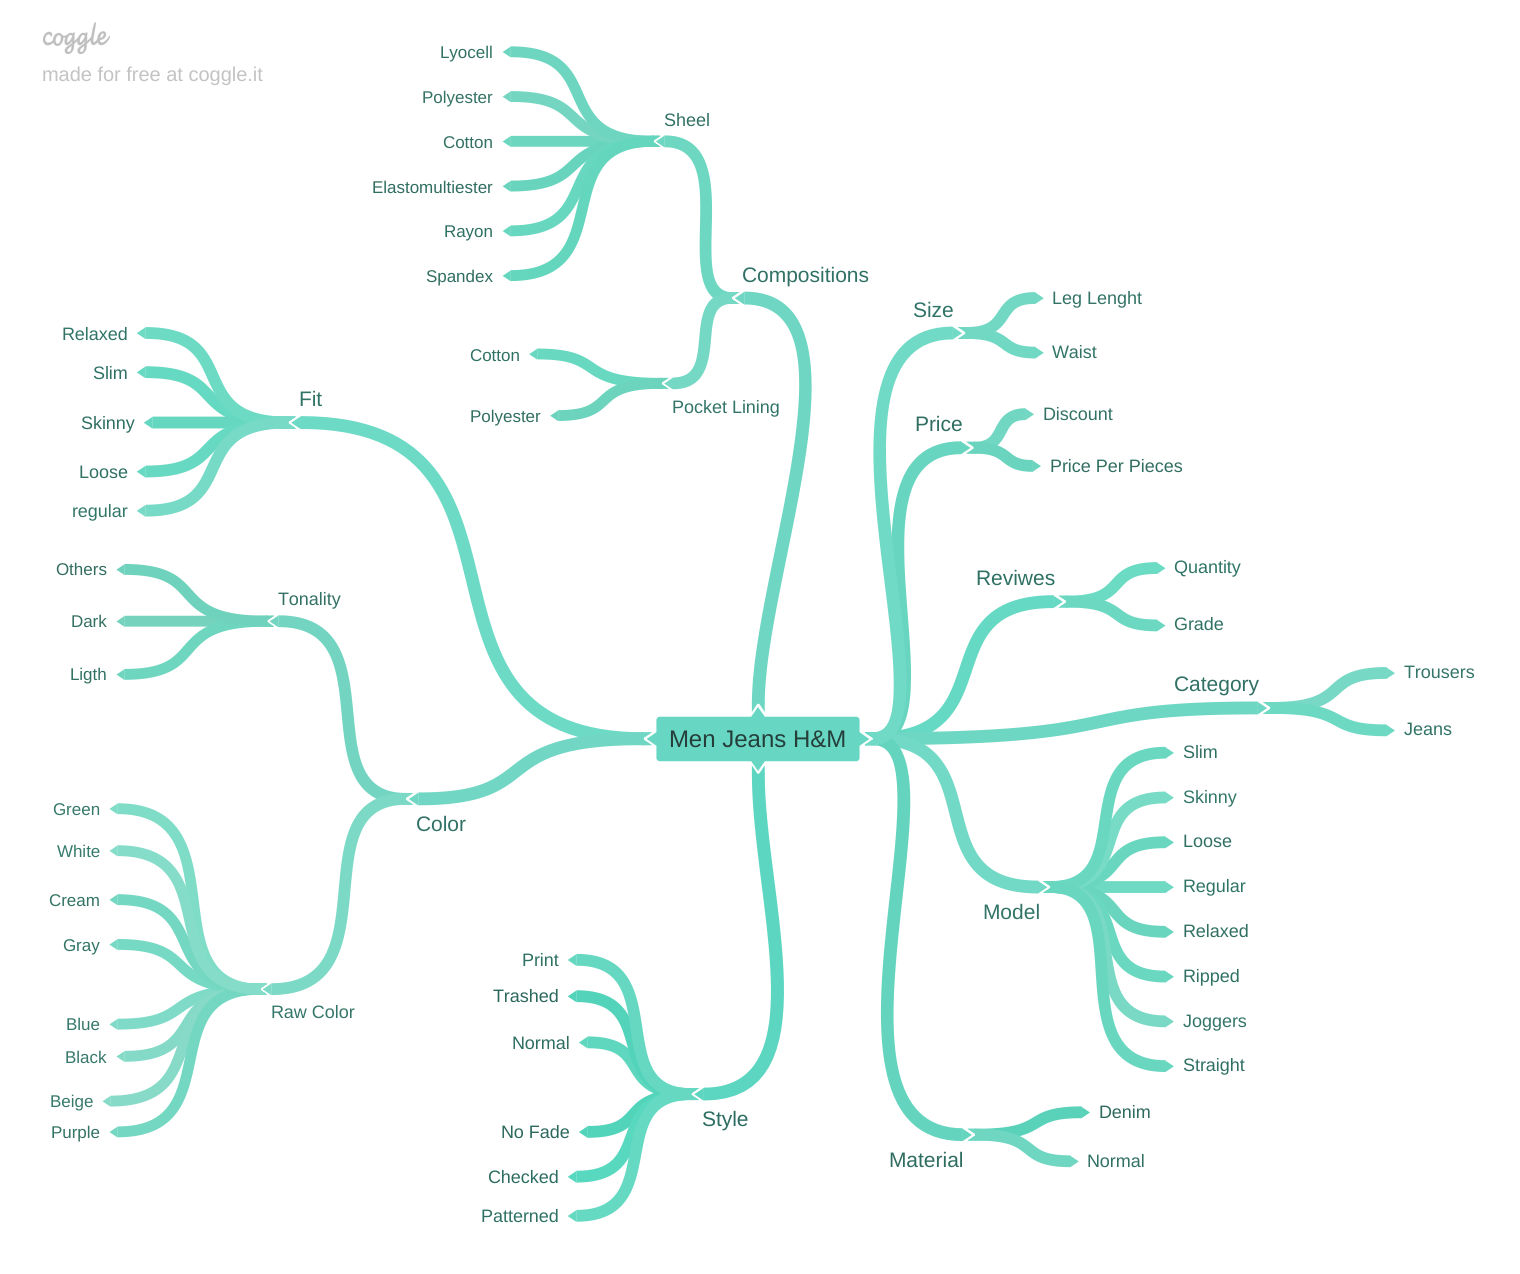

In [1223]:
Image( root_path+'/repos/img/mind-map-hypotheses.png')

## 3.2. Hypotheses Criation

* H1. Trousers category has higher prices than Jeans category.
* H2. Trousers category is more produce than Jeans category.
* H3. Dark colours are the most popular for jeans, while light colours are more popular for trousers.
* H4. Men's jeans with unique compositions in sheel and without pocket lining compositions, are cheaper than products with one or more in sheels and at least one in pocked lining.
* H5. Slim and skinny fit jeans are more popular than loose and relaxed fit jeans and that's why they are the cheapest.
* H6. The pricing strategy of the competitor for men's jeans is based on the product fit, 
with slim and skinny fit jeans being more expensive compared to loose and regular fit jeans.
* H7. The competitor offers a wider range of colours for men's jeans compared to trousers.
* H8. More than 70% of products use 100% of cotton in sheel compositions.

## 4.0. Exploratory Data Analysis

In [1224]:
df3 = df2.copy()

## 4.1 Univariate Analysis

In [1225]:
# including new columns in categorical variables
cat_attr = df3.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]' ] ) 

### 4.1.1. Response Variable

<AxesSubplot: xlabel='price_per_pieces', ylabel='Count'>

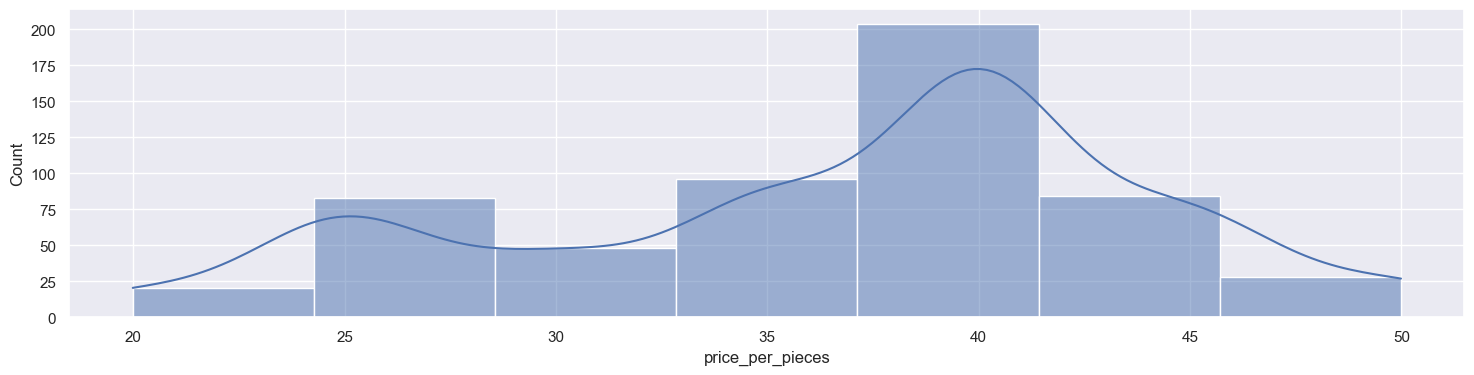

In [1226]:
plt.figure( figsize = (18, 4) )
sns.histplot( df3['price_per_pieces'], bins=7,  kde=True)

## 4.1.2. Numerical Variable

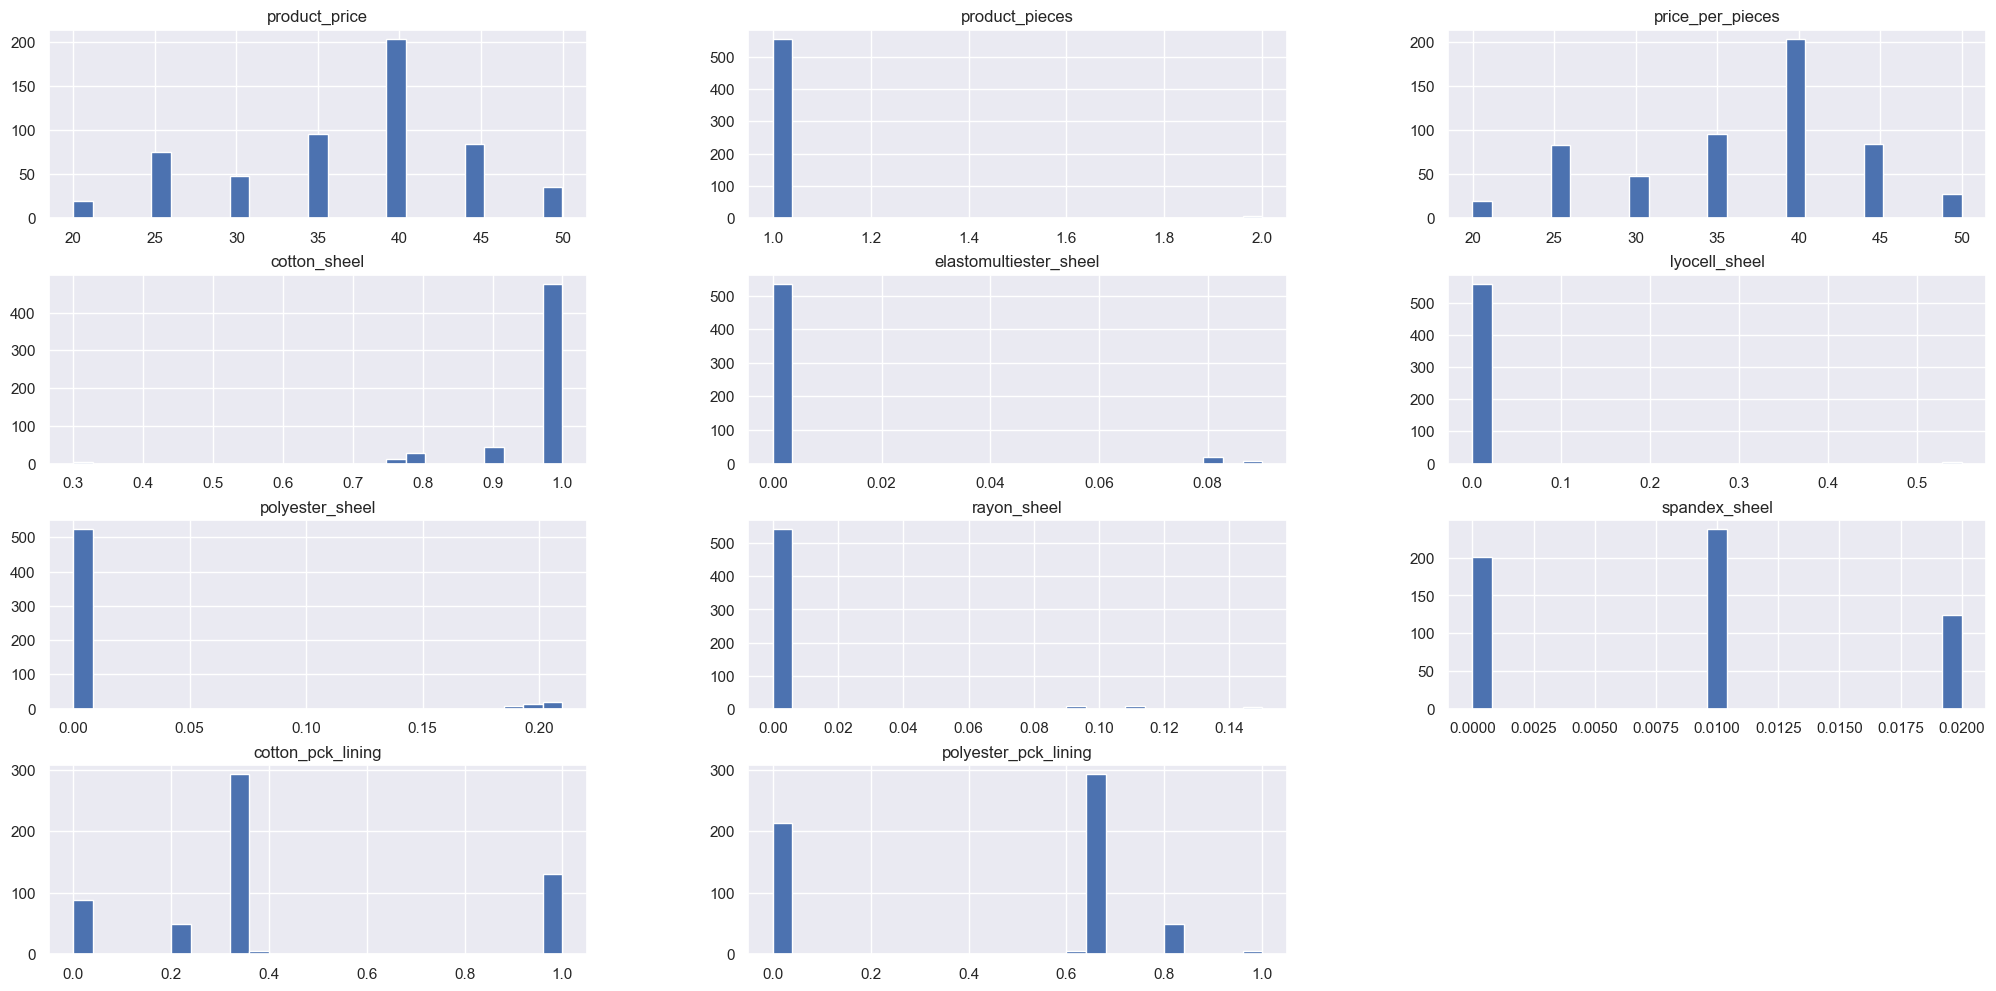

In [1227]:
num_attr.hist( bins= 25 )
plt.show()

In [1228]:
df3.columns.unique()

Index(['product_id', 'product_name', 'product_department', 'product_category',
       'product_fit', 'product_model', 'product_price', 'product_pieces',
       'price_per_pieces', 'cotton_sheel', 'elastomultiester_sheel',
       'lyocell_sheel', 'polyester_sheel', 'rayon_sheel', 'spandex_sheel',
       'cotton_pck_lining', 'polyester_pck_lining', 'start_scrapy',
       'end_scrapy', 'tonality_color', 'material', 'style', 'color'],
      dtype='object')

In [1229]:
df_melted_sheel = pd.melt(df3, value_vars = ['cotton_sheel', 'elastomultiester_sheel', 'lyocell_sheel', 
                                             'polyester_sheel', 'rayon_sheel', 'spandex_sheel'], 
                                             var_name = 'sheel_compositions', value_name = 'sheel_percentual')
df_melted_lining = pd.melt(df3, value_vars = ['cotton_pck_lining', 'polyester_pck_lining'], 
                           var_name = 'lining_compositions', value_name = 'lining_percentual')

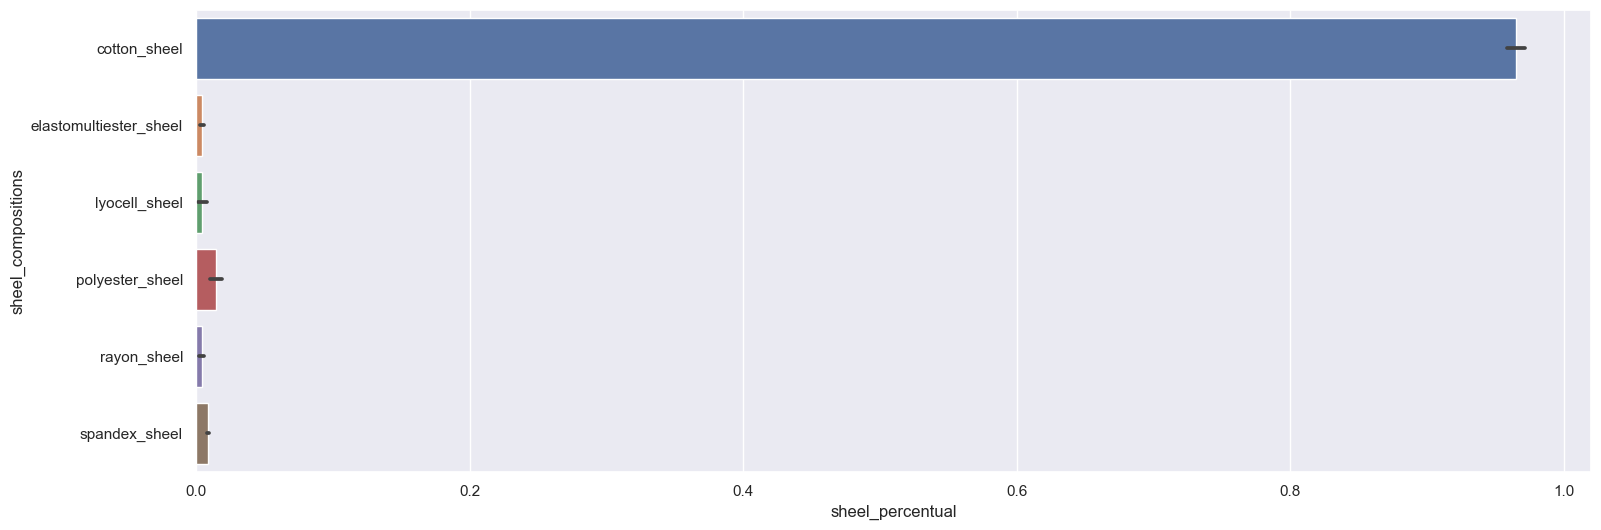

In [1230]:
plt.figure( figsize = (18, 6) )
sns.barplot(data=df_melted_sheel, x='sheel_percentual', y='sheel_compositions');

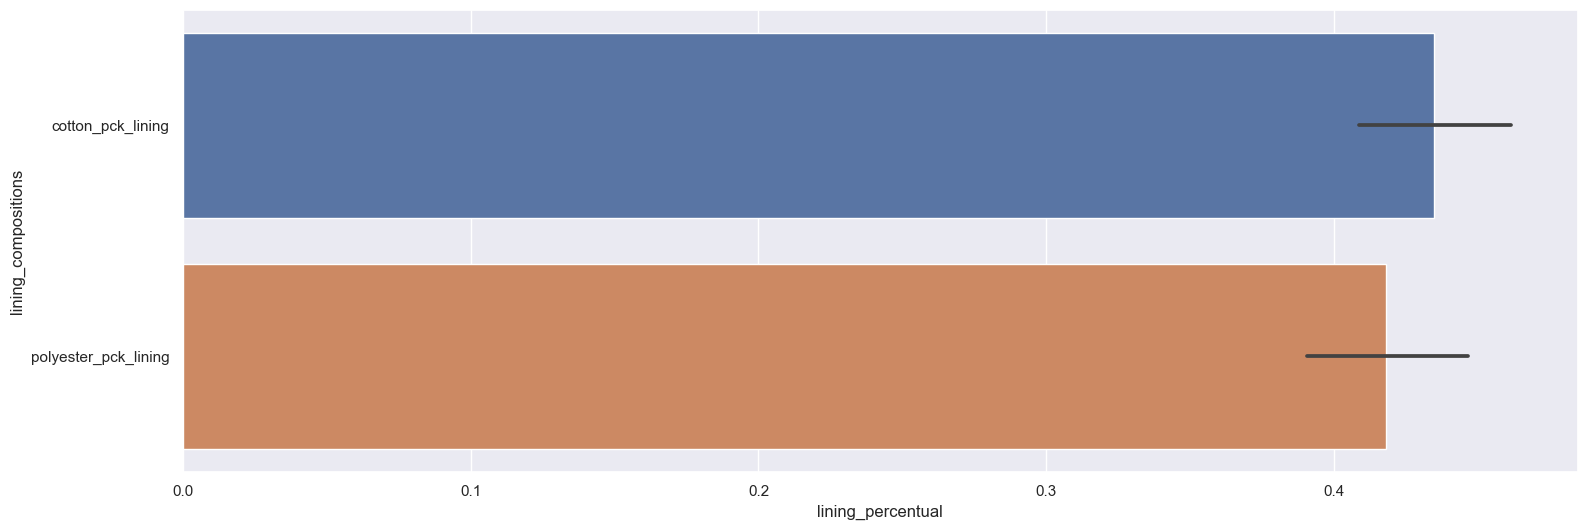

In [1231]:
plt.figure( figsize = (18, 6) )
sns.barplot(data=df_melted_lining, x='lining_percentual', y='lining_compositions');

### 4.1.3. Categorical Variable

Observation: Using `warn_singular=False` when Dataset has 0 variance to skipping density estimate.

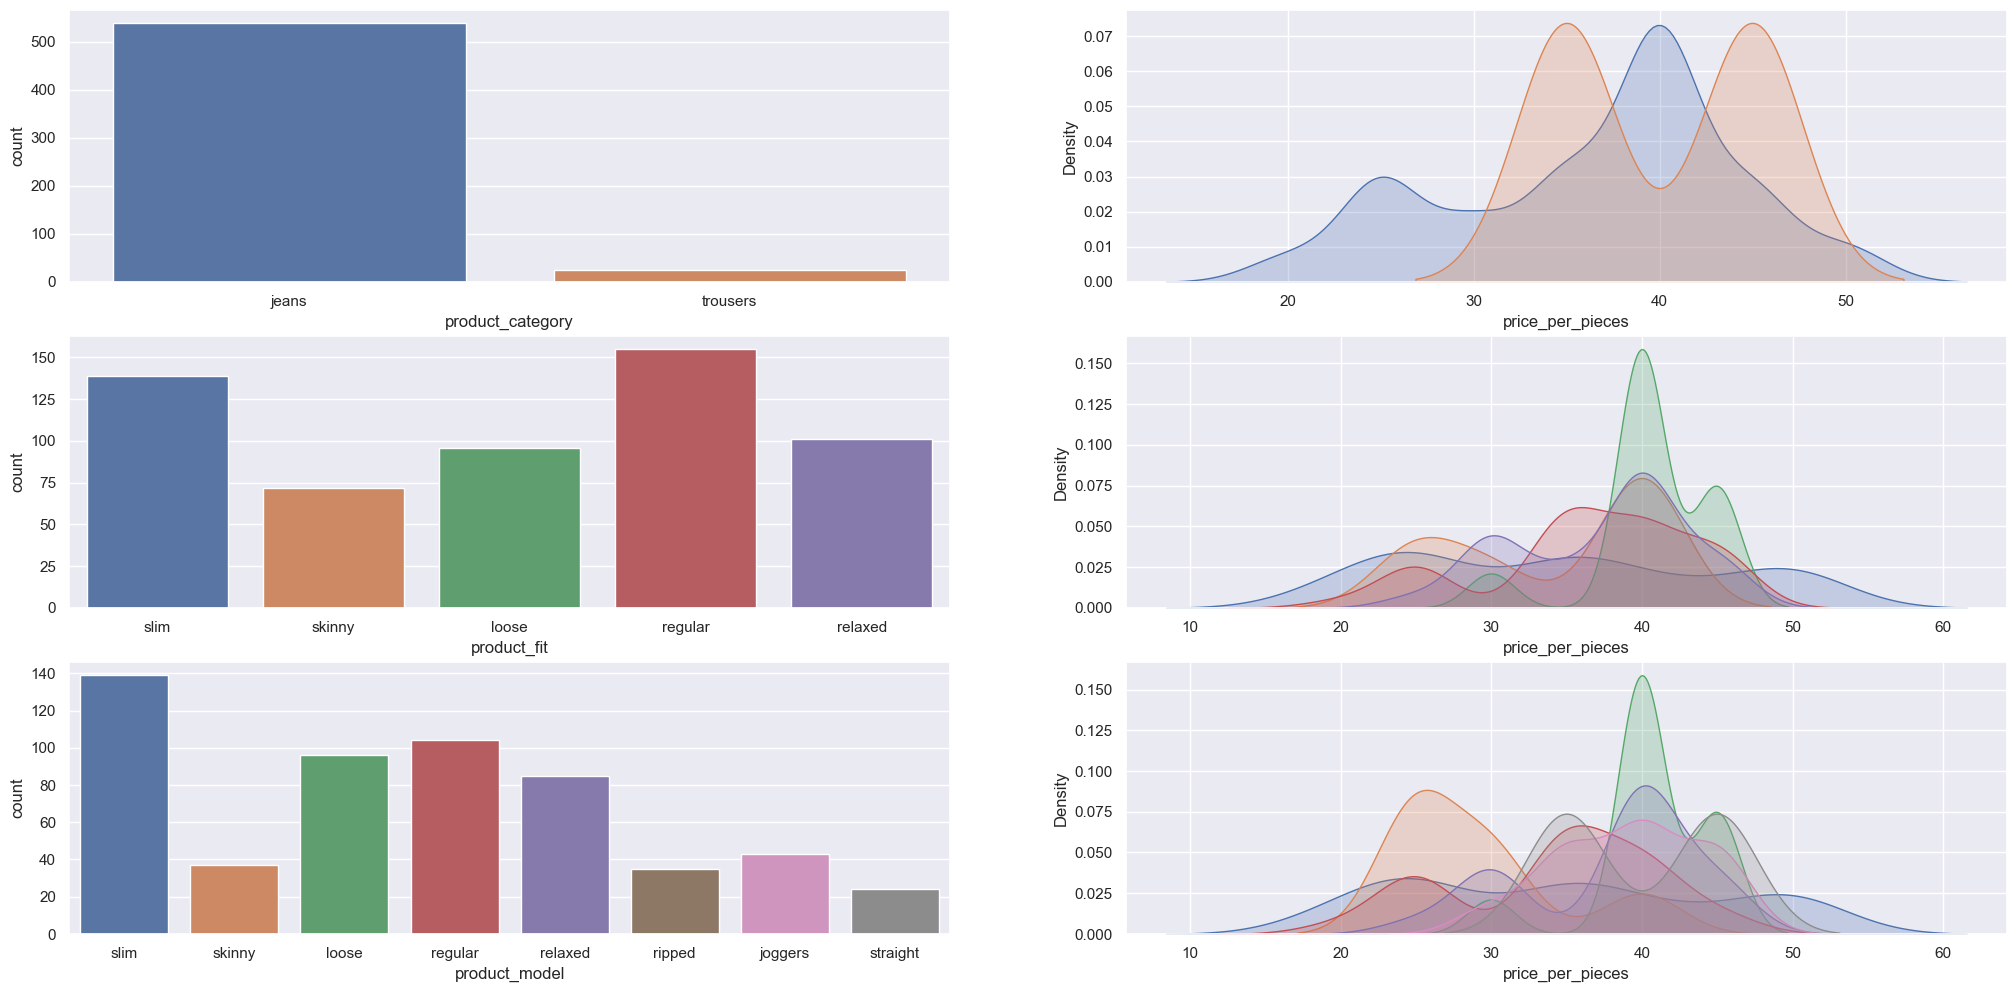

In [1232]:
# Category info
plt.subplot(3, 2, 1)
sns.countplot(x='product_category', data=df3)

plt.subplot(3, 2, 2)
sns.kdeplot( df3[ df3['product_category'] == 'jeans']['price_per_pieces'], label='Jeans', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_category'] == 'trousers']['price_per_pieces'], label='Trousers', fill=True, warn_singular=False )

# Fit info
plt.subplot(3, 2, 3)
sns.countplot(x='product_fit', data=df3)

plt.subplot(3, 2, 4)
sns.kdeplot( df3[ df3['product_fit'] == 'slim']['price_per_pieces'], label='Slim', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_fit'] == 'skinny']['price_per_pieces'], label='Skinny', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_fit'] == 'loose']['price_per_pieces'], label='Loose', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_fit'] == 'regular']['price_per_pieces'], label='Regular', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_fit'] == 'relaxed']['price_per_pieces'], label='Relaxed', fill=True, warn_singular=False )

#Model info
plt.subplot(3, 2, 5)
sns.countplot(x='product_model', data=df3)

plt.subplot(3, 2, 6)
sns.kdeplot( df3[ df3['product_model'] == 'slim']['price_per_pieces'], label='Slim', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_model'] == 'skinny']['price_per_pieces'], label='Skinny', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_model'] == 'loose']['price_per_pieces'], label='Loose', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_model'] == 'regular']['price_per_pieces'], label='Regular', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_model'] == 'relaxed']['price_per_pieces'], label='Relaxed', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_model'] == 'ripped']['price_per_pieces'], label='Ripped', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_model'] == 'joggers']['price_per_pieces'], label='joggers', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['product_model'] == 'straight']['price_per_pieces'], label='straight', fill=True, warn_singular=False )
plt.show()


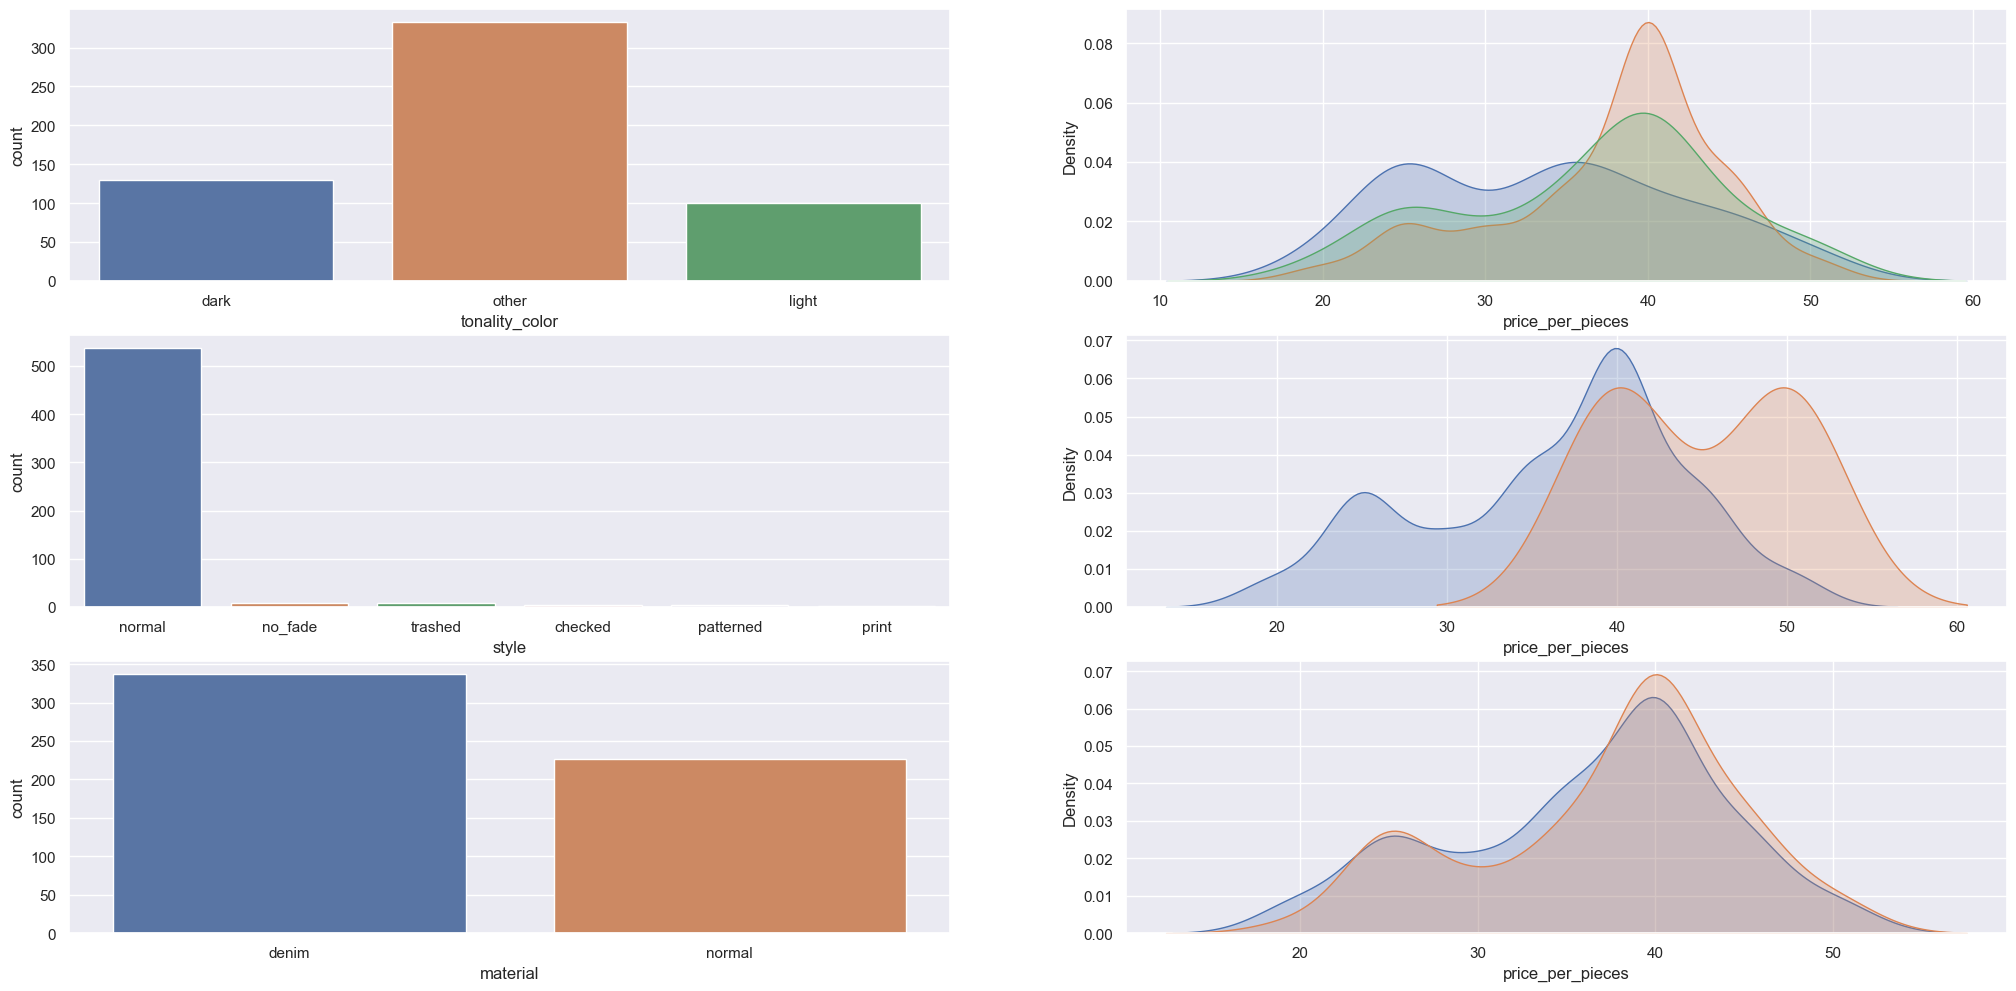

In [1233]:
# Tonality info
plt.subplot(3, 2, 1)
sns.countplot(x='tonality_color', data=df3)

plt.subplot(3, 2, 2)
sns.kdeplot( df3[ df3['tonality_color'] == 'dark']['price_per_pieces'], label='Dark', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['tonality_color'] == 'other']['price_per_pieces'], label='Other', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['tonality_color'] == 'light']['price_per_pieces'], label='Light', fill=True, warn_singular=False )

# Style info
plt.subplot(3, 2, 3)
sns.countplot(x='style', data=df3)

plt.subplot(3, 2, 4)
sns.kdeplot( df3[ df3['style'] == 'normal']['price_per_pieces'], label='Normal', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['style'] == 'no_fade']['price_per_pieces'], label='No Fade', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['style'] == 'trashed']['price_per_pieces'], label='Trashed', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['style'] == 'checked']['price_per_pieces'], label='Checked', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['style'] == 'patterned']['price_per_pieces'], label='Patterned', fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['style'] == 'print']['price_per_pieces'], label='Print', fill=True, warn_singular=False )

# Material info
plt.subplot(3, 2, 5)
sns.countplot(x='material', data=df3)

plt.subplot(3, 2, 6)
sns.kdeplot( df3[ df3['material'] == 'denim']['price_per_pieces'], label='Denim', fill=True,  warn_singular=False )
sns.kdeplot( df3[ df3['material'] == 'normal']['price_per_pieces'], label='Normal', fill=True, warn_singular=False )
plt.show()

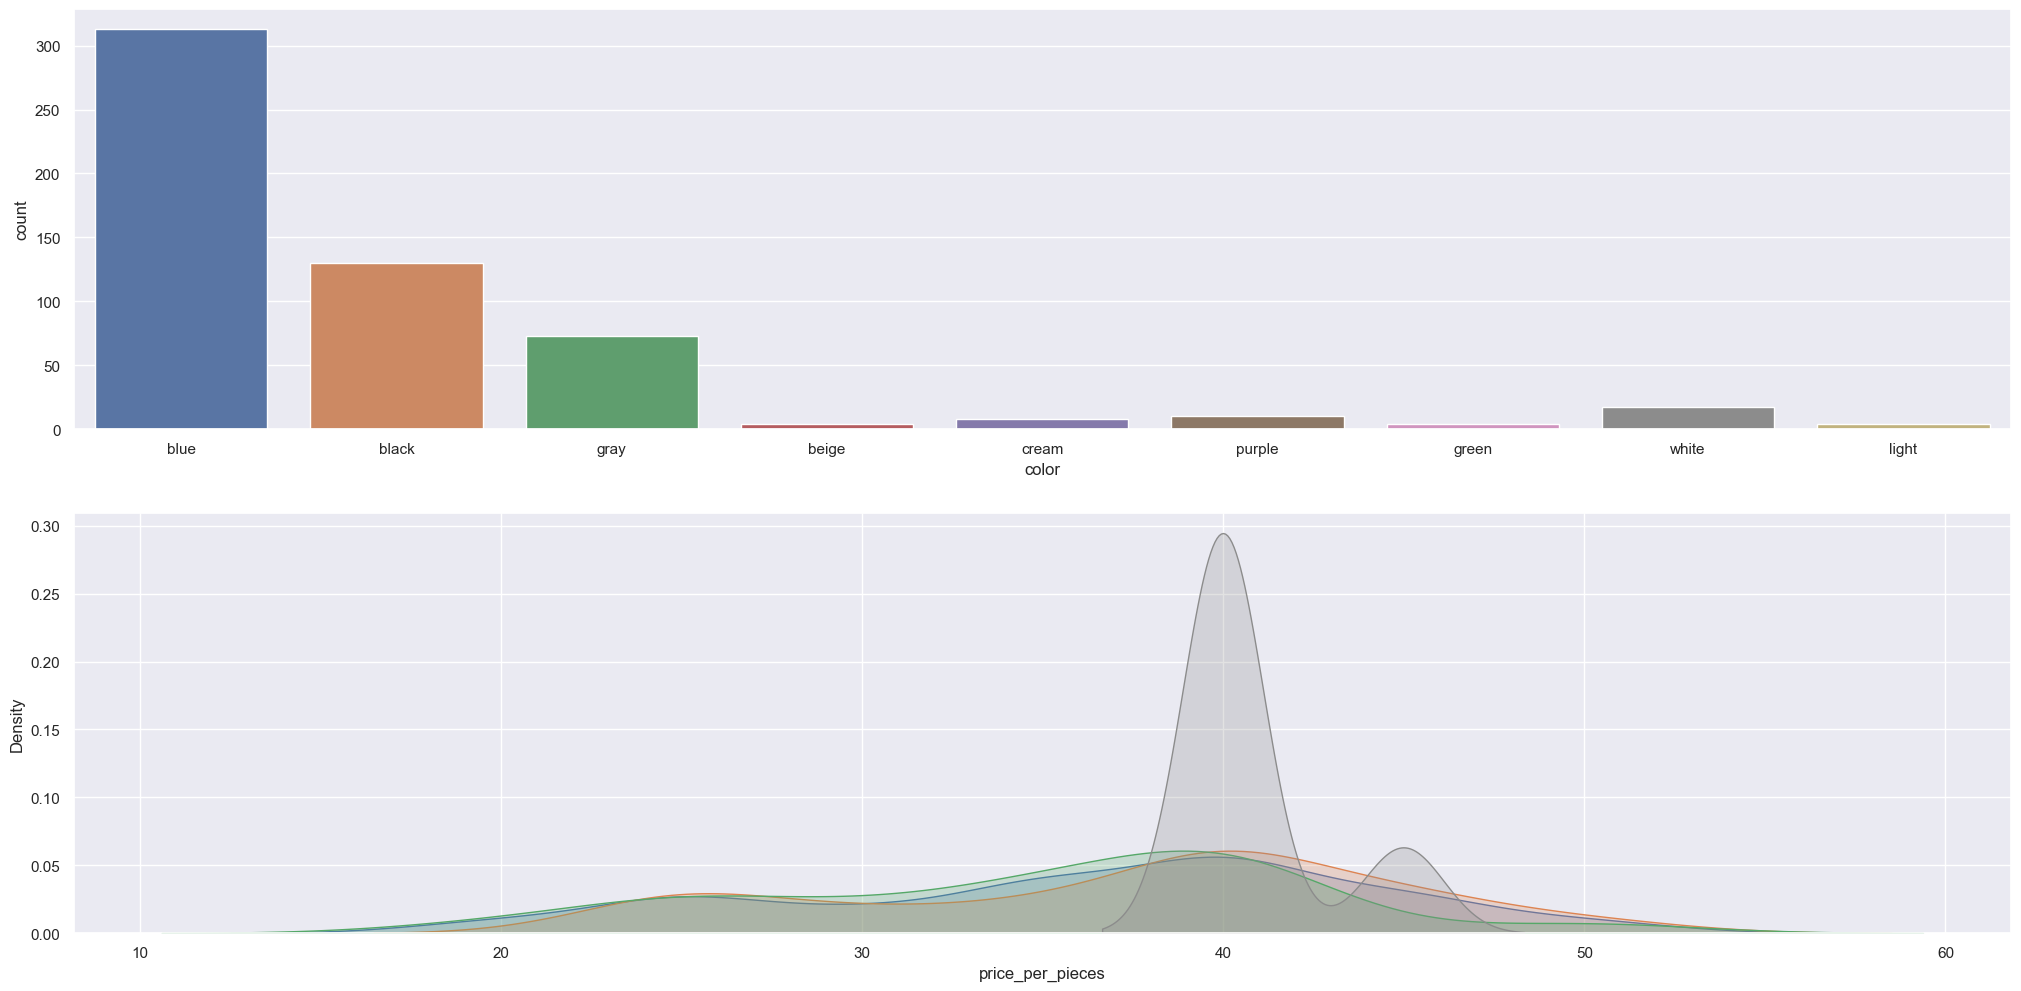

In [1234]:
#denim ,light

# Style info
plt.subplot(2, 1, 1)
sns.countplot(x='color', data=df3 )

plt.subplot(2, 1, 2)
sns.kdeplot( df3[ df3['color'] == 'blue']['price_per_pieces'],  label='blue',    fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['color'] == 'black']['price_per_pieces'], label='black',   fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['color'] == 'gray']['price_per_pieces'],  label='gray',    fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['color'] == 'beige']['price_per_pieces'], label='beige',   fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['color'] == 'cream']['price_per_pieces'], label='cream',    fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['color'] == 'purple']['price_per_pieces'],label='purple',  fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['color'] == 'green']['price_per_pieces'], label='green',   fill=True, warn_singular=False )
sns.kdeplot( df3[ df3['color'] == 'white']['price_per_pieces'], label='white',   fill=True, warn_singular=False )
plt.show()

## 4.2. Bivariate Analysis

In [1235]:
df4 = df3.copy()

### 4.2.1. H1. 
**Assumption: Trousers category has higher prices than Jeans category.**

<span style="color:yellow">**Answer**: Yes. Trousers category has a mean price higher than jeans.</span>

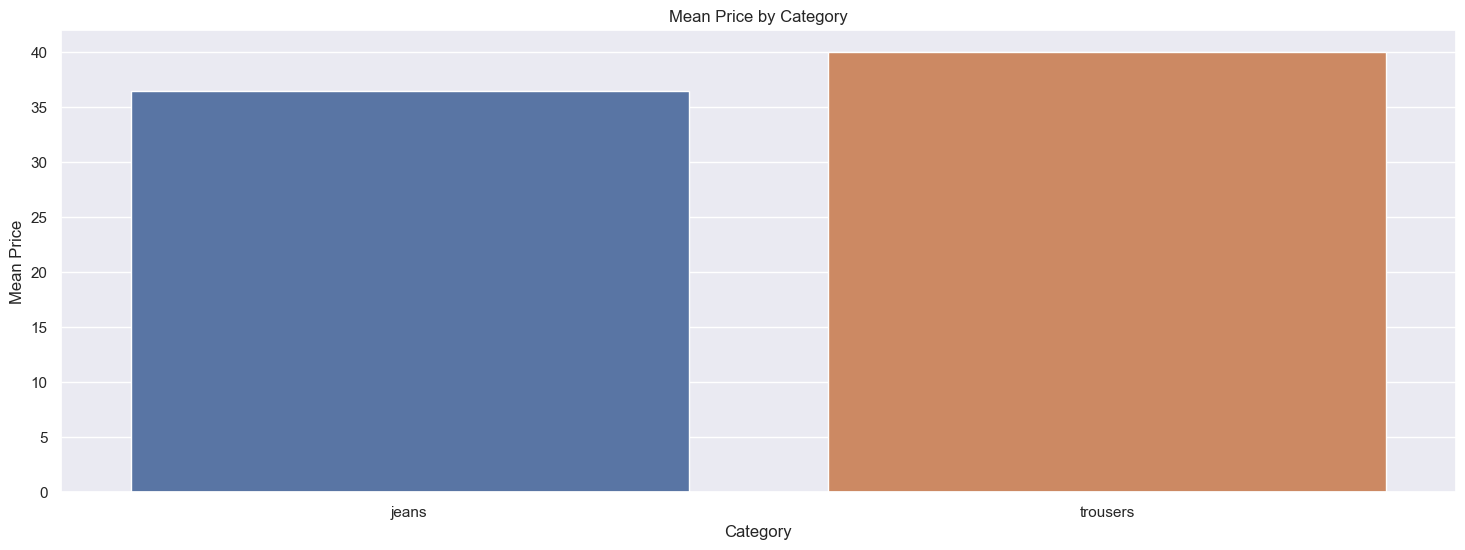

In [1236]:
mean_prices_categories = df4.groupby('product_category')['price_per_pieces'].mean().reset_index()

plt.figure( figsize = (18, 6))
sns.barplot( x = 'product_category', y = 'price_per_pieces', data = mean_prices_categories )
plt.title( 'Mean Price by Category')
plt.xlabel('Category')
plt.ylabel('Mean Price');

### 4.2.2 H2. Trousers category is more produce than Jeans category.
<span style="color:yellow">**Answer**: No. More than 95% of products are Jeans category.</span>

Percentage of Jeans: 95.74%
Percentage of Trousers: 4.26%


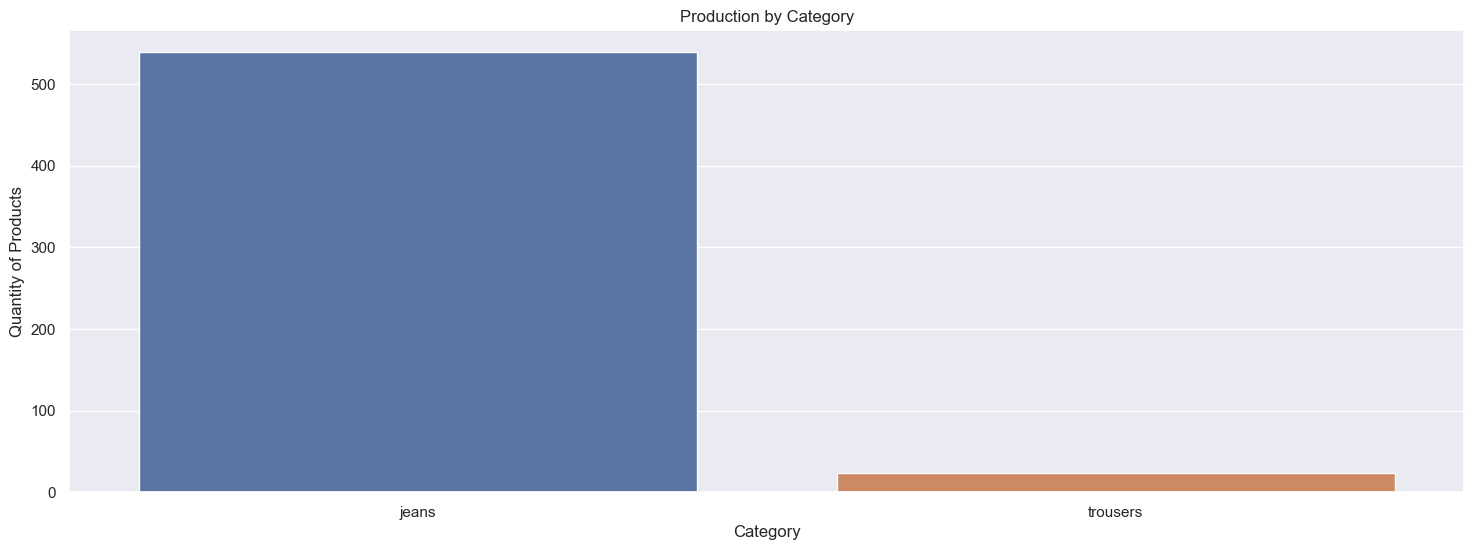

In [1237]:
qtd_by_cat = df4.groupby('product_category').count().reset_index()

porct = get_percentage(qtd_by_cat['product_id'], qtd_by_cat['product_id'].sum())
print(f'Percentage of Jeans: {porct[0]}%')
print(f'Percentage of Trousers: {porct[1]}%')

plt.figure( figsize = (18, 6))
sns.barplot( x = 'product_category', y = 'price_per_pieces', data = qtd_by_cat )
plt.title( 'Production by Category')
plt.xlabel('Category')
plt.ylabel('Quantity of Products');




### 4.2.3. H3. 
**Assumption: Dark colours are the most popular for jeans, while light colours are more popular for trousers.**

<span style="color:yellow">**Answer**: For both categories the most common colors are of the 'other' type, this case involves normal and special tones, such as 'olive' for example. However, in relation to shades 'Dark' and 'Light', it is possible to state that 'Light' is more popular for Trousers, as there are no models of the 'Dark' type in this category and in Jeans this shade is the second most used. .</span>

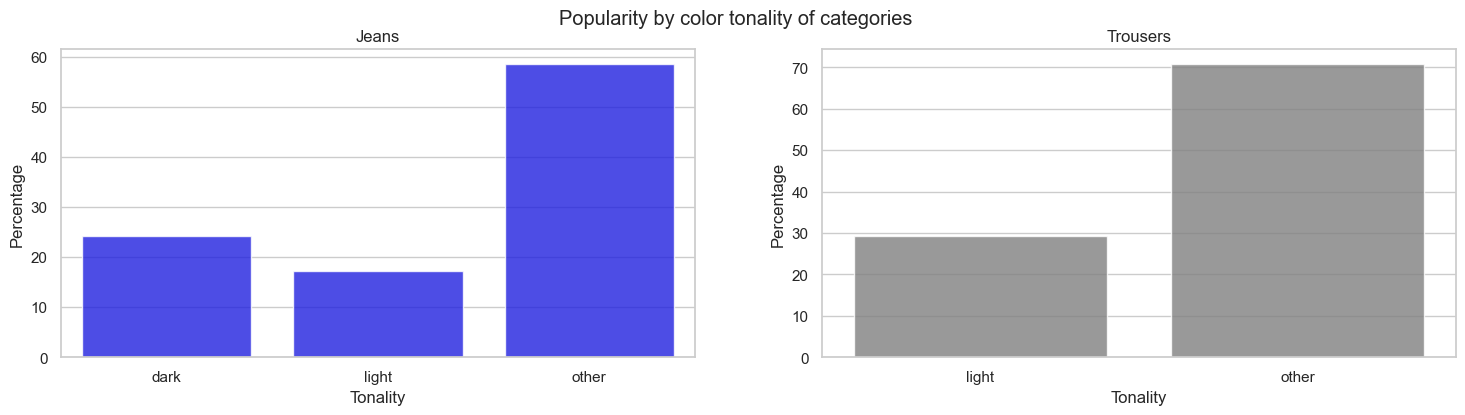

In [1238]:
qtd_cat_tonality = df4[['product_category', 'tonality_color', 'product_id']].groupby(['product_category','tonality_color']).count().reset_index()

jeans = qtd_cat_tonality.loc[qtd_cat_tonality['product_category'] == 'jeans', ['tonality_color', 'product_id'] ]
trousers = qtd_cat_tonality.loc[qtd_cat_tonality['product_category'] == 'trousers', ['tonality_color', 'product_id'] ]

jeans['popularity'] = get_percentage( jeans['product_id'], jeans['product_id'].sum() )
jeans = jeans.drop('product_id', axis=1)

trousers['popularity'] = get_percentage(trousers['product_id'], trousers['product_id'].sum() )
trousers = trousers.drop('product_id', axis=1)

sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, figsize=(18, 4))
fig.suptitle( 'Popularity by color tonality of categories')


plt.subplot(1, 2, 1)
sns.barplot(x=jeans['tonality_color'], y=jeans['popularity'], color='blue', alpha=0.8, label='Jeans')
plt.title('Jeans')
plt.xlabel('Tonality')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
sns.barplot(x=trousers['tonality_color'], y=trousers['popularity'], color='gray', alpha=0.8, label='Trousers')
plt.title('Trousers')
plt.xlabel('Tonality')
plt.ylabel('Percentage')

plt.show()


### 4.2.4. H4. 
**Assumption: Men's jeans with unique compositions in sheel and without pocket lining compositions, are cheaper than products with one or more in sheels and at least one in pocked lining.**

<span style="color:yellow"> If we look at the average price ticket in each situation, we have: For cases with single compositions for shell and pocket lining the average per product is $37.5 and for cases with two or more values in the compositions the average is $35. Thus, it can be said that in fact cases with a single composition tend to be a little more expensive than those with several.</span>

Text(0, 0.5, 'Price')

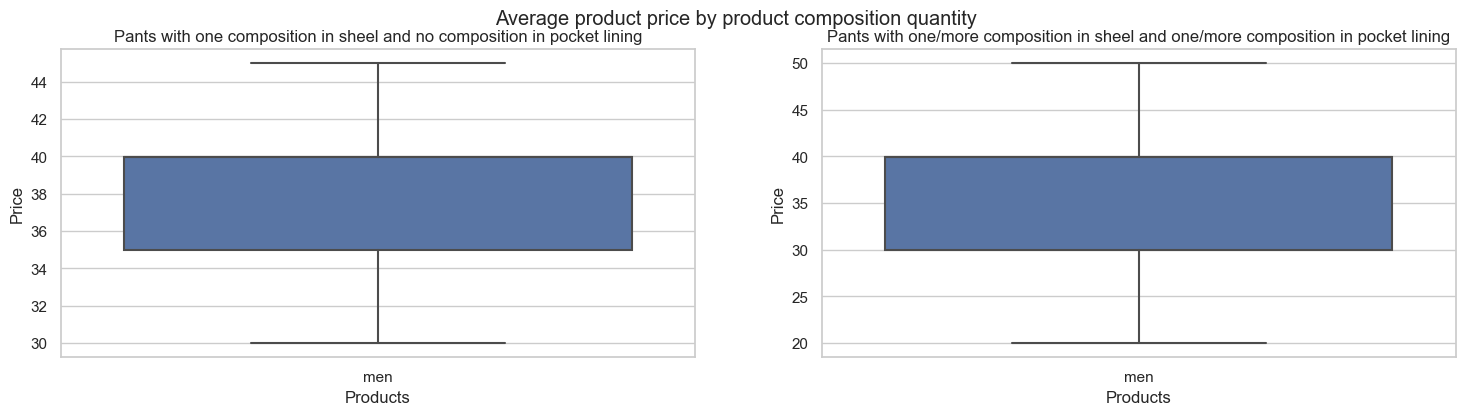

In [1239]:
#aux1 df with one composition in sheel and no compositions in pocket lining
aux1 = df4.loc[(df4['cotton_pck_lining'] == 0) & (df4['polyester_pck_lining'] == 0)]
aux1 = aux1.loc[(aux1['cotton_sheel'] != 0) | (aux1['elastomultiester_sheel'] != 0) |  	(aux1['lyocell_sheel'] != 0) | 
                (aux1['polyester_sheel'] != 0) | (aux1['rayon_sheel'] != 0) | (aux1['spandex_sheel'] != 0) | 
                (aux1['cotton_pck_lining'] != 0) | (aux1['polyester_pck_lining'] != 0)]

#aux2 df with one or more composition in sheel and one or more compositions in pocket lining
aux2 = df4.loc[(df4['cotton_pck_lining'] != 0) | (df4['polyester_pck_lining'] != 0)]
aux2 = aux2.loc[(aux2['cotton_sheel'] != 100) | (aux2['elastomultiester_sheel'] != 100) |  	(aux2['lyocell_sheel'] != 100) | 
                (aux2['polyester_sheel'] != 100) | (aux2['rayon_sheel'] != 100) | (aux2['spandex_sheel'] != 100) | 
                (aux2['cotton_pck_lining'] != 100) | (aux2['polyester_pck_lining'] != 100)]

sns.set(style="whitegrid")
fig, axs = plt.subplots(ncols=2, figsize=(18, 4))
fig.suptitle( 'Average product price by product composition quantity')

plt.subplot(1, 2, 1)
sns.boxplot(x='product_department', y='price_per_pieces', data=aux1)
plt.title('Pants with one composition in sheel and no composition in pocket lining')
plt.xlabel('Products')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
sns.boxplot(x='product_department', y='price_per_pieces', data=aux2)
plt.title('Pants with one/more composition in sheel and one/more composition in pocket lining')
plt.xlabel('Products')
plt.ylabel('Price')




### 4.2.5. H5. 
**Assumption: Slim and skinny fit jeans are more popular than loose and relaxed fit jeans and that's why they are the cheapest.**

<span style="color:yellow">**Answer**: Yes. Slim and Skinny are 37.48% of the products while Loose and Relaxed are 34.99%.</span>

Percentage to Slim and Skinny: 37.48%
Percentage to Loose and Relaxed: 34.99%


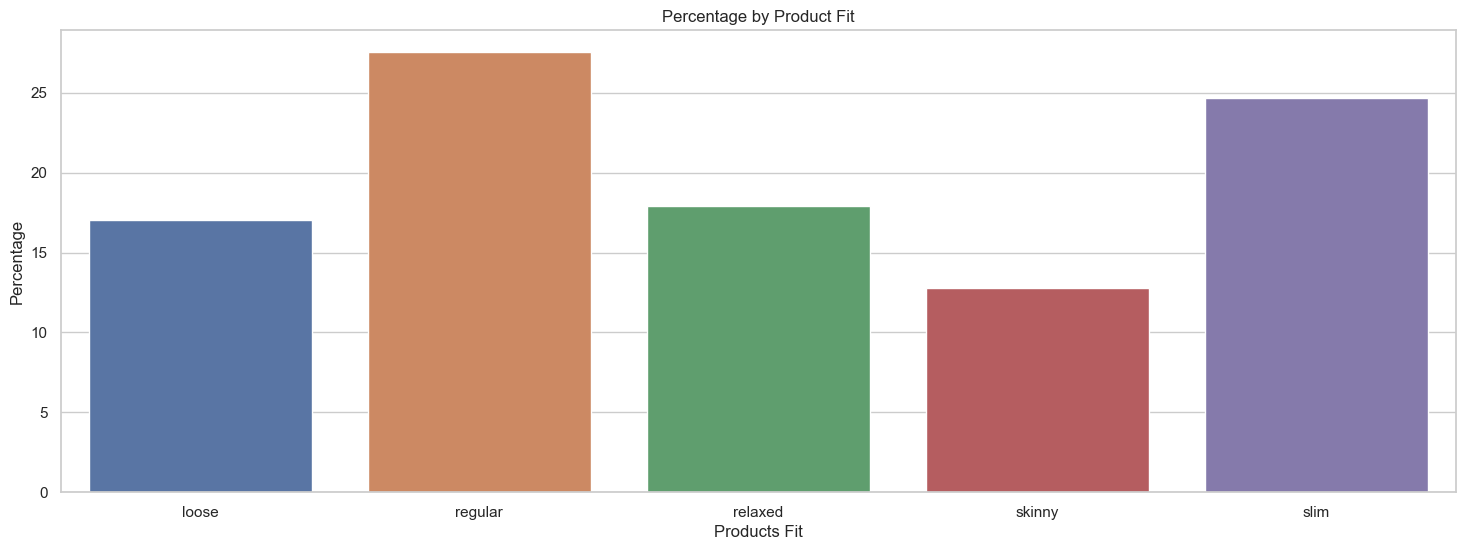

In [1240]:
aux = df4[['product_fit', 'product_id']].groupby('product_fit').count().reset_index()
aux['product_id'] = (aux['product_id'] * 100) / aux['product_id'].sum()

perct_1 = aux.loc[aux['product_fit'].isin(['slim', 'skinny'])].sum()
perct_2 = aux.loc[aux['product_fit'].isin(['loose', 'relaxed'])].sum()

print(f'Percentage to Slim and Skinny: {round(perct_1[1],2)}%')
print(f'Percentage to Loose and Relaxed: {round(perct_2[1],2)}%')

plt.figure( figsize = (18, 6))
sns.barplot(data=aux, x='product_fit', y='product_id')
plt.title("Percentage by Product Fit")
plt.xlabel('Products Fit')
plt.ylabel('Percentage');


### 4.2.6. H6 
**Assumption: The pricing strategy of the competitor for men's jeans is based on the product fit, with slim and skinny fit jeans being more expensive compared to loose and regular fit jeans**

<span style="color:yellow">**Answer**: No. The average price for Slim and Skinny is $34.52 and for Loose and Relaxed is $38.92, so Slim and Skinny has an average price of $4.40 less.</span>

Average for Slim and Skinny: $34.52
Average for Loose and Relaxed: $38.92


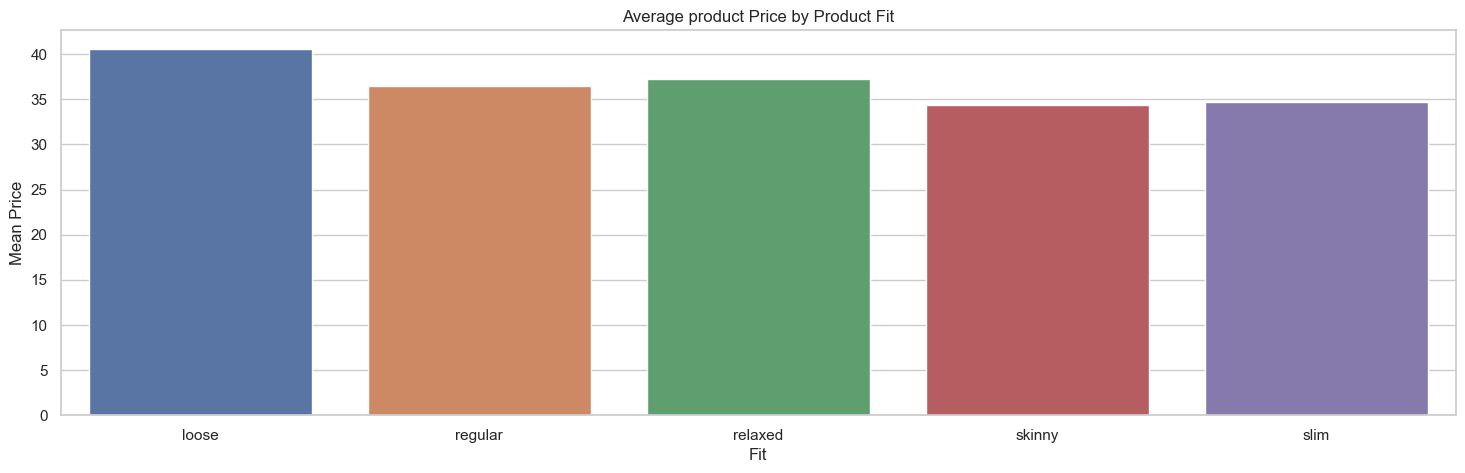

In [1241]:
aux = df4[['product_fit', 'price_per_pieces']].groupby('product_fit').mean(numeric_only=True).reset_index()
#aux['product_id'] = (aux['product_id'] * 100) / aux['product_id'].sum()

mean1 = aux.loc[aux['product_fit'].isin(['slim', 'skinny'])].mean(numeric_only=True)
mean2 = aux.loc[aux['product_fit'].isin(['loose', 'relaxed'])].mean(numeric_only=True)

print(f'Average for Slim and Skinny: ${round(mean1[0],2)}')
print(f'Average for Loose and Relaxed: ${round(mean2[0],2)}')

plt.figure( figsize = (18, 5))
sns.barplot(data=aux, x='product_fit', y='price_per_pieces')

plt.title("Average product Price by Product Fit")
plt.xlabel('Fit')
plt.ylabel('Mean Price')

plt.show()

### 4.2.7. H7
**Assumption: The competitor offers a wider range of colours for men's jeans compared to trousers.**

<span style="color:yellow">**Answer**: Yes. Jeans category has 9 type of colors and Trousers has only 4.</span>

In [1242]:
df4.groupby(['product_category', 'color'])['product_id'].count()

product_category  color 
jeans             beige       4
                  black     124
                  blue      302
                  cream       8
                  gray       69
                  green       4
                  light       4
                  purple     10
                  white      14
trousers          black       6
                  blue       11
                  gray        4
                  white       3
Name: product_id, dtype: int64

### 4.2.8. H8
**Assumption: More than 70% of products use 100% of cotton in sheel compositions.**

<span style="color:yellow">**Answer**: False. Only 33.57% of products use 100% of cotton in sheel composition.</span>

In [1243]:
#aux1 df with one composition in sheel and no compositions in pocket lining
cotton_100 = df4.loc[ df4['cotton_sheel'] == 1 ]
others = df4.loc[ df4['cotton_sheel'] < 1 ]
cotton_100['product_id'].count(), others['product_id'].count()

porct = get_percentage(cotton_100['product_id'].count(), cotton_100['product_id'].count()+others['product_id'].count())
print( f'Only {porct}% of products use 100% of cotton in sheel composition.' )

Only 33.57% of products use 100% of cotton in sheel composition.


## 4.3. Multivariate Analysis

### 4.3.1. Numerical Attributes

<AxesSubplot: >

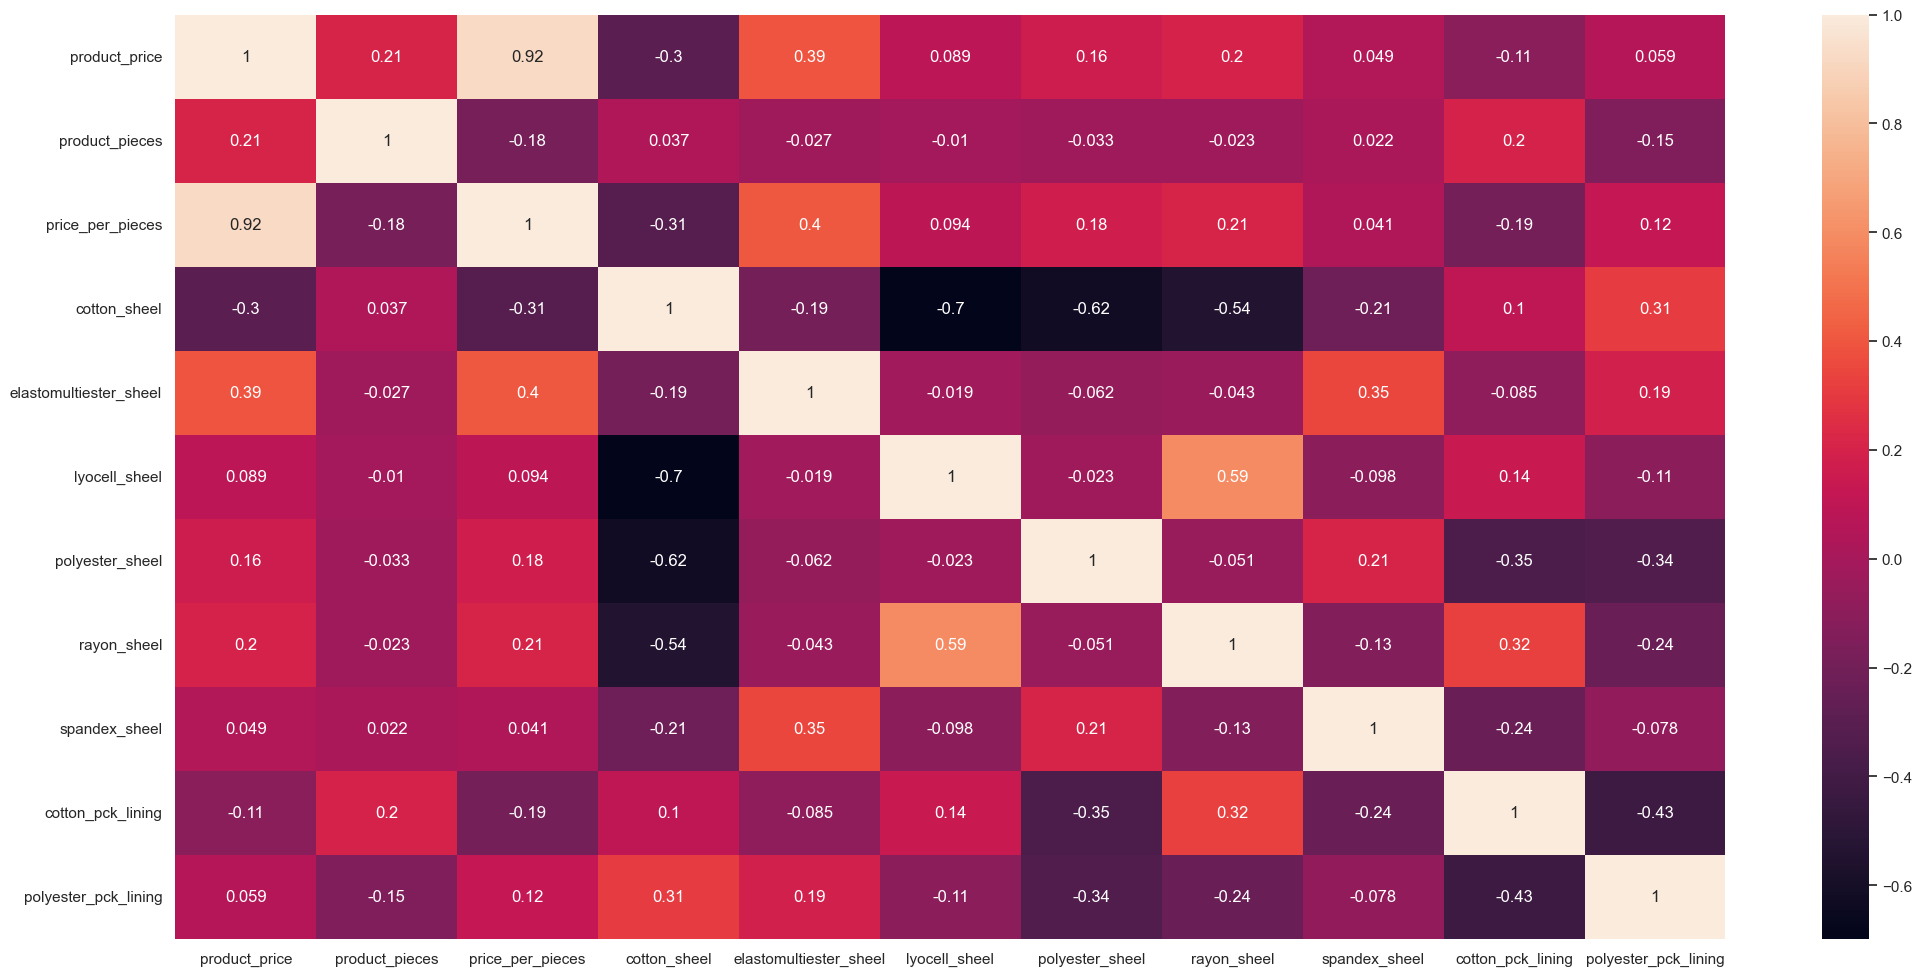

In [1244]:
num_correlation = num_attr.corr( method='pearson' )
sns.heatmap( num_correlation, annot=True )

### 4.3.2. Categorical Attributes

<AxesSubplot: >

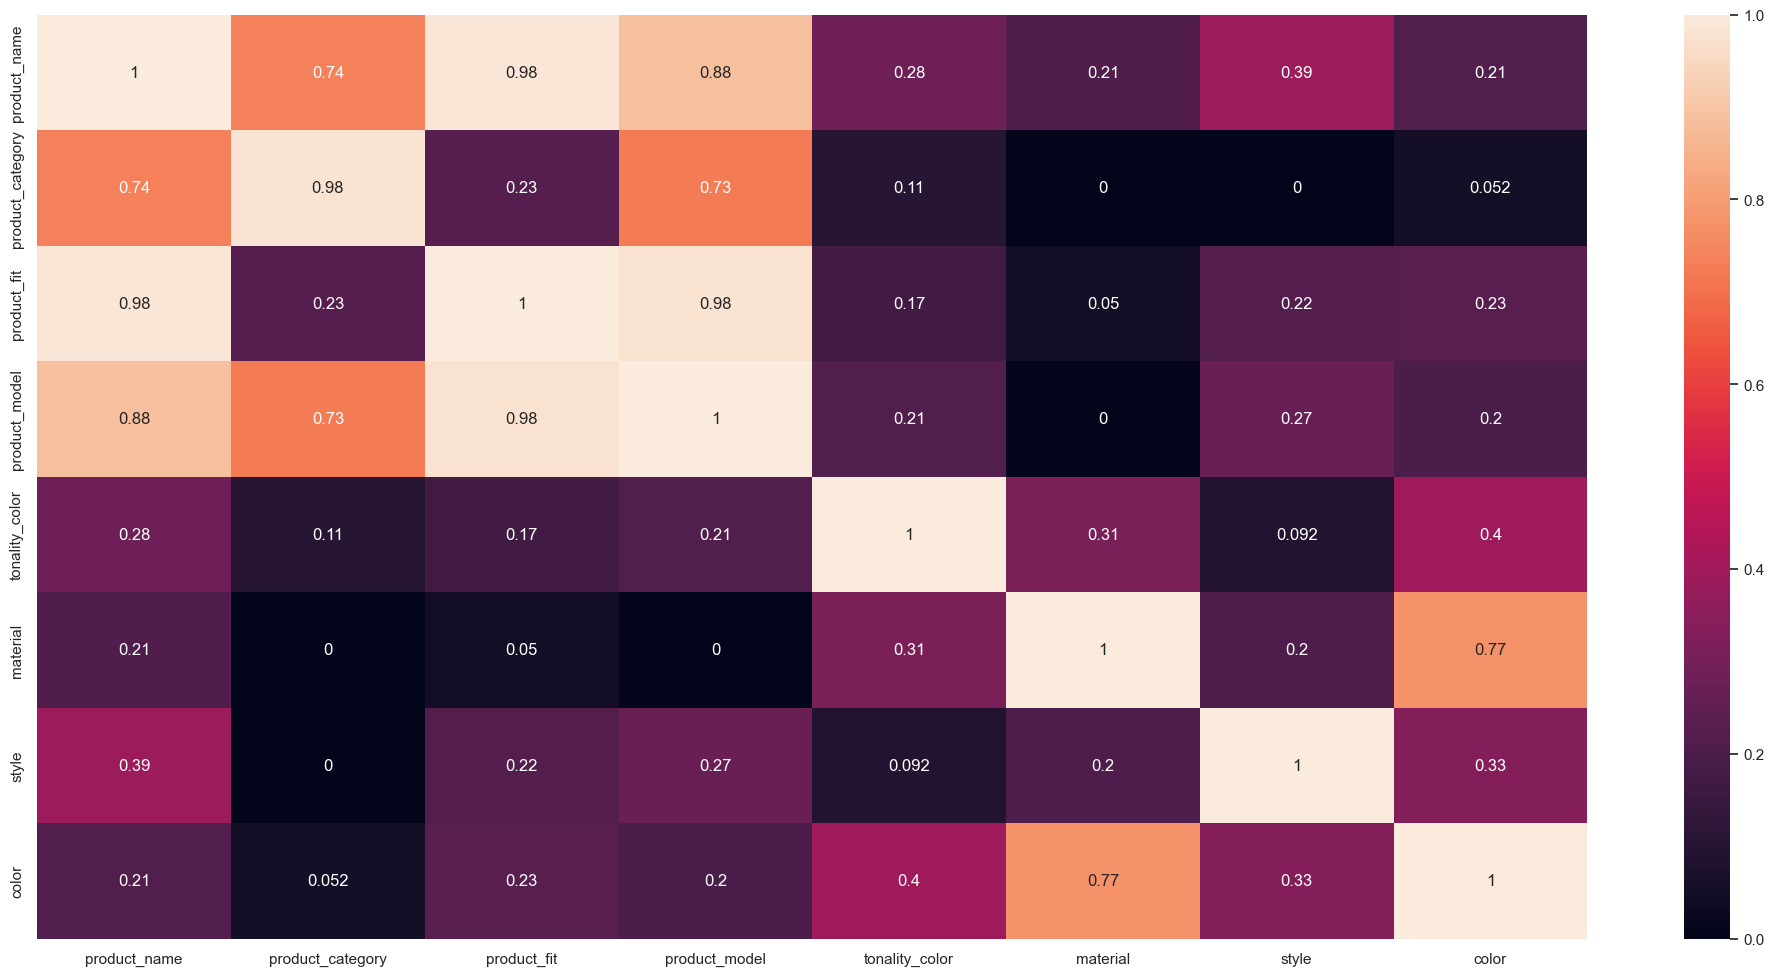

In [1245]:
cat_attr2 = cat_attr[['product_name', 'product_category', 'product_fit', 'product_model', 'tonality_color', 'material', 'style', 'color' ]]

a1 = cramer_v_bias_correction(cat_attr2['product_name'], cat_attr2['product_name'])
a2 = cramer_v_bias_correction(cat_attr2['product_name'], cat_attr2['product_category'])
a3 = cramer_v_bias_correction(cat_attr2['product_name'], cat_attr2['product_fit'])
a4 = cramer_v_bias_correction(cat_attr2['product_name'], cat_attr2['product_model'])
a5 = cramer_v_bias_correction(cat_attr2['product_name'], cat_attr2['tonality_color'])
a6 = cramer_v_bias_correction(cat_attr2['product_name'], cat_attr2['material'])
a7 = cramer_v_bias_correction(cat_attr2['product_name'], cat_attr2['style'])
a8 = cramer_v_bias_correction(cat_attr2['product_name'], cat_attr2['color'])

b1 = cramer_v_bias_correction(cat_attr2['product_category'], cat_attr2['product_name'])
b2 = cramer_v_bias_correction(cat_attr2['product_category'], cat_attr2['product_category'])
b3 = cramer_v_bias_correction(cat_attr2['product_category'], cat_attr2['product_fit'])
b4 = cramer_v_bias_correction(cat_attr2['product_category'], cat_attr2['product_model'])
b5 = cramer_v_bias_correction(cat_attr2['product_category'], cat_attr2['tonality_color'])
b6 = cramer_v_bias_correction(cat_attr2['product_category'], cat_attr2['material'])
b7 = cramer_v_bias_correction(cat_attr2['product_category'], cat_attr2['style'])
b8 = cramer_v_bias_correction(cat_attr2['product_category'], cat_attr2['color'])

c1 = cramer_v_bias_correction(cat_attr2['product_fit'], cat_attr2['product_name'])
c2 = cramer_v_bias_correction(cat_attr2['product_fit'], cat_attr2['product_category'])
c3 = cramer_v_bias_correction(cat_attr2['product_fit'], cat_attr2['product_fit'])
c4 = cramer_v_bias_correction(cat_attr2['product_fit'], cat_attr2['product_model'])
c5 = cramer_v_bias_correction(cat_attr2['product_fit'], cat_attr2['tonality_color'])
c6 = cramer_v_bias_correction(cat_attr2['product_fit'], cat_attr2['material'])
c7 = cramer_v_bias_correction(cat_attr2['product_fit'], cat_attr2['style'])
c8 = cramer_v_bias_correction(cat_attr2['product_fit'], cat_attr2['color'])

d1 = cramer_v_bias_correction(cat_attr2['product_model'], cat_attr2['product_name'])
d2 = cramer_v_bias_correction(cat_attr2['product_model'], cat_attr2['product_category'])
d3 = cramer_v_bias_correction(cat_attr2['product_model'], cat_attr2['product_fit'])
d4 = cramer_v_bias_correction(cat_attr2['product_model'], cat_attr2['product_model'])
d5 = cramer_v_bias_correction(cat_attr2['product_model'], cat_attr2['tonality_color'])
d6 = cramer_v_bias_correction(cat_attr2['product_model'], cat_attr2['material'])
d7 = cramer_v_bias_correction(cat_attr2['product_model'], cat_attr2['style'])
d8 = cramer_v_bias_correction(cat_attr2['product_model'], cat_attr2['color'])

e1 = cramer_v_bias_correction(cat_attr2['tonality_color'], cat_attr2['product_name'])
e2 = cramer_v_bias_correction(cat_attr2['tonality_color'], cat_attr2['product_category'])
e3 = cramer_v_bias_correction(cat_attr2['tonality_color'], cat_attr2['product_fit'])
e4 = cramer_v_bias_correction(cat_attr2['tonality_color'], cat_attr2['product_model'])
e5 = cramer_v_bias_correction(cat_attr2['tonality_color'], cat_attr2['tonality_color'])
e6 = cramer_v_bias_correction(cat_attr2['tonality_color'], cat_attr2['material'])
e7 = cramer_v_bias_correction(cat_attr2['tonality_color'], cat_attr2['style'])
e8 = cramer_v_bias_correction(cat_attr2['tonality_color'], cat_attr2['color'])

f1 = cramer_v_bias_correction(cat_attr2['material'], cat_attr2['product_name'])
f2 = cramer_v_bias_correction(cat_attr2['material'], cat_attr2['product_category'])
f3 = cramer_v_bias_correction(cat_attr2['material'], cat_attr2['product_fit'])
f4 = cramer_v_bias_correction(cat_attr2['material'], cat_attr2['product_model'])
f5 = cramer_v_bias_correction(cat_attr2['material'], cat_attr2['tonality_color'])
f6 = cramer_v_bias_correction(cat_attr2['material'], cat_attr2['material'])
f7 = cramer_v_bias_correction(cat_attr2['material'], cat_attr2['style'])
f8 = cramer_v_bias_correction(cat_attr2['material'], cat_attr2['color'])

g1 = cramer_v_bias_correction(cat_attr2['style'], cat_attr2['product_name'])
g2 = cramer_v_bias_correction(cat_attr2['style'], cat_attr2['product_category'])
g3 = cramer_v_bias_correction(cat_attr2['style'], cat_attr2['product_fit'])
g4 = cramer_v_bias_correction(cat_attr2['style'], cat_attr2['product_model'])
g5 = cramer_v_bias_correction(cat_attr2['style'], cat_attr2['tonality_color'])
g6 = cramer_v_bias_correction(cat_attr2['style'], cat_attr2['material'])
g7 = cramer_v_bias_correction(cat_attr2['style'], cat_attr2['style'])
g8 = cramer_v_bias_correction(cat_attr2['style'], cat_attr2['color'])

h1 = cramer_v_bias_correction(cat_attr2['color'], cat_attr2['product_name'])
h2 = cramer_v_bias_correction(cat_attr2['color'], cat_attr2['product_category'])
h3 = cramer_v_bias_correction(cat_attr2['color'], cat_attr2['product_fit'])
h4 = cramer_v_bias_correction(cat_attr2['color'], cat_attr2['product_model'])
h5 = cramer_v_bias_correction(cat_attr2['color'], cat_attr2['tonality_color'])
h6 = cramer_v_bias_correction(cat_attr2['color'], cat_attr2['material'])
h7 = cramer_v_bias_correction(cat_attr2['color'], cat_attr2['style'])
h8 = cramer_v_bias_correction(cat_attr2['color'], cat_attr2['color'])

df_crammer = pd.DataFrame( {'product_name': [a1, a2, a3, a4, a5, a6, a7, a8],
               'product_category':    [b1, b2, b3, b4, b5, b6, b7, b8],
               'product_fit':    [c1, c2, c3, c4, c5, c6, c7, c8],
               'product_model': [d1, d2, d3, d4, d5, d6, d7, d8],
               'tonality_color':    [e1, e2, e3, e4, e5, e6, e7, e8],
               'material':    [f1, f2, f3, f4, f5, f6, f7, f8],
               'style':    [g1, g2, g3, g4, g5, g6, g7, g8],
               'color':    [h1, h2, h3, h4, h5, h6, h7, h8]})

df_crammer = df_crammer.set_index(df_crammer.columns)

sns.heatmap(df_crammer, annot=True)


## 5.0. Answering Business Questions

In [1246]:
df5 = df4.copy()

### 5.1.1. What are the necessary raw materials/compositions for making these pants comparing with the five most produce products from H&M?

<span style="color:orange">By grouping the 'material' field ('denim' and 'regular') with the percentage information of the external (sheel) and internal compositions (pocket lining) of the fabric. We can see that H&M has 35 varieties of compositions for creating pieces. A strategy that the customer can use to check which materials/compositions will be used in their parts is to replicate the most built models among the 35 varieties. <br><br>Assuming that the customer will initially use the sets of materials and compositions of the five cases most created by the competitor, the main materials would be: <br><br>At least 80% of the products must be Denim and 20% a different material classified as 'Normal'. <br><br> For cases using Denim: <br>Between 40% - 45% must use 100% cotton in sheel. <br>For the rest of the cases with Denim (55% to 60%), a variation between 98% and 99% of cotton in sheel can be used and for the rest of the sheel, use spandex (1% to 2%).<br> Regarding the composition of the pocket lining, 75% of Denim products must use a mixture of 35% cotton and 65% polyester and the rest 100% cotton. <br><br> For cases using 'Normal': <br>All pieces will use 100% cotton in sheel. <br>And Regarding the composition of the pocket lining, all cases will use 35% cotton and 65% polyester.

</span>

In [1283]:
material = df5.groupby(['material', 'cotton_sheel', 'elastomultiester_sheel',
       'lyocell_sheel', 'polyester_sheel', 'rayon_sheel', 'spandex_sheel',
       'cotton_pck_lining', 'polyester_pck_lining']).size().reset_index(name='count')

material = material.sort_values(by='count', ascending=False).reset_index(drop=True)

print(f'Variety of products by materials and compositions: {len(material)}')
print('Five most produced products:')
five_material = material.head()
five_material


Variety of products by materials and compositions: 35
Five most produced products:


,material,cotton_sheel,elastomultiester_sheel,lyocell_sheel,polyester_sheel,rayon_sheel,spandex_sheel,cotton_pck_lining,polyester_pck_lining,count
0,denim,1.00,0.00,0.00,0.00,0.00,0.00,0.35,0.65,103
1,normal,1.00,0.00,0.00,0.00,0.00,0.00,0.35,0.65,54
2,denim,0.99,0.00,0.00,0.00,0.00,0.01,0.35,0.65,51
3,denim,0.99,0.00,0.00,0.00,0.00,0.01,1.00,0.00,51
4,denim,0.98,0.00,0.00,0.00,0.00,0.02,0.35,0.65,33


In [1298]:
qtd_denim = five_material[five_material['material'] == 'denim'].count()[0]
denim_porct = get_percentage(qtd_denim, 5)
normal_porct = 100 - denim_porct

print(f'Percentage for Denim: {denim_porct}%')
print(f'Percentage for Normal: {normal_porct}%')

total_pieces_denim = five_material[five_material['material'] == 'denim']['count'].sum()
denim_cotton_sheel_100 = get_percentage(103, total_pieces_denim)

print(f'Percentage for Denim with 100% of cotton_sheel: {denim_cotton_sheel_100}%')
print(f'Percentage for Denim with other percentage of cotton_sheel: {100 - denim_cotton_sheel_100}%')

Percentage for Denim: 80.0%
Percentage for Normal: 20.0%
Percentage for Denim with 100% of cotton_sheel: 43.28%
Percentage for Denim with other percentage of cotton_sheel: 56.72%


### 5.1.2. What are the sets of models, styles and fits produced by H&M and which is the most produced?

<span style="color:orange">Types of Models: slim, regular, loose, relaxed, skinny, joggers, straight, ripped</span><br>
<span style="color:orange">Types of Styles: normal, trashed, checked, no_fade, patterned, print</span><br>
<span style="color:orange">Types of Fits: slim, regular, loose, relaxed and skinny</span>

<span style="color:orange">The most produced model: slim <br> The most produced style: normal <br> The most produced fit: slim</span>

In [1326]:
model_style = df5.groupby(['product_model', 'style', 'product_fit']).size().reset_index(name='count')

model_style = model_style.sort_values(by='count', ascending=False).reset_index(drop=True)

print('Types of Models: ', model_style['product_model'].unique())
print('Types of Styles: ', model_style['style'].unique())
print('Types of Fits: ', model_style['product_fit'].unique())
print(f'\nThe most produced model: {model_style["product_model"][0]}')
print(f'The most produced style: {model_style["style"][0]}')
print(f'The most produced fit: {model_style["product_fit"][0]}')

model_style

Types of Models:  ['slim' 'regular' 'loose' 'relaxed' 'skinny' 'joggers' 'straight' 'ripped']
Types of Styles:  ['normal' 'trashed' 'checked' 'no_fade' 'patterned' 'print']
Types of Fits:  ['slim' 'regular' 'loose' 'relaxed' 'skinny']

The most produced model: slim
The most produced style: normal
The most produced fit: slim


,product_model,style,product_fit,count
0,slim,normal,slim,135
1,regular,normal,regular,100
2,loose,normal,loose,92
3,relaxed,normal,relaxed,85
4,skinny,normal,skinny,35
5,joggers,normal,regular,27
6,straight,normal,regular,24
7,ripped,normal,skinny,23
8,joggers,normal,relaxed,16
9,ripped,trashed,skinny,8


### 5.1.3. What are the tonality and colors used by H&M and what are the 10 most used varieties?

<span style="color:orange">All/Top10 Tonalities:  dark, light and other (Neutral is the most common, the others is olive, graphite, etc. )</span><br>
<span style="color:orange">All Colors:  black, blue, gray, light, purple, beige, cream, green and white</span><br>
<span style="color:orange">All Colors:  black, blue, gray, light, purple, beige and cream</span><br>

<span style="color:orange">In the cases of the 10 most used tones, 60% are of the 'other' type and of these, at least 50% are of the neutral type (for the colors blue, black and white) and the others are tones such as beige, graphite and olive.</span>

<span style="color:orange">The most used colors are approximately 58% blue, 23% black, 13% gray, 3% white, 2% cream and 1% purple.</span>

<span style="color:orange">Note 1: Approximately 49% of the products are composed of other neutral tones.</span>
<span style="color:orange">Note 2: Approximately 57% of the products are composed of blue colors.</span>

In [1338]:
tonality_colors = df5.groupby(['tonality_color', 'color']).size().reset_index(name='count')
print('Tonalities: ',tonality_colors['tonality_color'].unique())
print('Colors: ', tonality_colors['color'].unique())
tonality_colors = tonality_colors.sort_values(by='count', ascending=False).reset_index(drop=True)
tonality_colors


Tonalities:  ['dark' 'light' 'other']
Colors:  ['black' 'blue' 'gray' 'light' 'purple' 'beige' 'cream' 'green' 'white']


,tonality_color,color,count
0,other,blue,140
1,other,black,126
2,dark,blue,87
3,light,blue,86
4,dark,gray,39
5,other,gray,28
6,other,white,17
7,other,cream,8
8,light,gray,6
9,other,purple,6


In [1364]:
tonality_colors_10 = tonality_colors.head(10).copy()
print('Top 10 tonalities: ' ,tonality_colors_10['tonality_color'].unique())
print('Top 10 Colors: ', tonality_colors_10['color'].unique())

tonality_colors_10['percentage'] = tonality_colors_10['count'].apply( lambda x: round(get_percentage(x, tonality_colors_10['count'].sum()), 1))
tonality_colors_10


Top 10 tonalities:  ['other' 'dark' 'light']
Top 10 Colors:  ['blue' 'black' 'gray' 'white' 'cream' 'purple']


,tonality_color,color,count,percentage
0,other,blue,140,25.80
1,other,black,126,23.20
2,dark,blue,87,16.00
3,light,blue,86,15.80
4,dark,gray,39,7.20
5,other,gray,28,5.20
6,other,white,17,3.10
7,other,cream,8,1.50
8,light,gray,6,1.10
9,other,purple,6,1.10


In [1365]:
total_by_color = tonality_colors_10.groupby(['color'])['count'].sum().reset_index()
total_by_color = total_by_color.sort_values(by='count', ascending=False).reset_index(drop=True)
total_by_color['percentage'] = total_by_color['count'].apply( lambda x: round(get_percentage(x, total_by_color['count'].sum()),1))
total_by_color

,color,count,percentage
0,blue,313,57.60
1,black,126,23.20
2,gray,73,13.40
3,white,17,3.10
4,cream,8,1.50
5,purple,6,1.10


### 5.1.5. What are the most suitable characteristics to compose an initial set of products for Star Jeans and what are the best prices for these products?

<span style="color:orange">Material: Denim</span>

<span style="color:orange">Style: Normal</span>

<span style="color:orange">Sheel Composition: 100% Cotton or Cotton with a maximum of 2% spandex </span>

<span style="color:orange">Sheel Pocket Lining: 100% Cotton or 35% Cotton and 65% of Polyester</span>

<span style="color:orange">Tonality/Color: Netral/Blue, Netral/Black, Dark/Blue, Light/Blue, Dark/Gray and Light/Gray</span>

<span style="color:orange">Fit/Model: Slim, Regular, Loose, Relaxed, Skinny, Regular/Joggers, Regular/Straight, Skinny/Ripped, Relaxed/Joggers</span>

In [1430]:
best_products = df5[(df5['material'] == 'denim') & (df5['style'] == 'normal') & (df5['cotton_sheel'] >= 0.98)
                     & (df5['spandex_sheel'] <= 0.2) & (df5['cotton_pck_lining'] >= 0.35) & (df5['cotton_pck_lining'] <= 0.65)
                     & ( ( df5['tonality_color'] == 'other' ) & ( df5['color'] == 'blue' ) |
                         ( df5['tonality_color'] == 'other' ) & ( df5['color'] == 'black' ) |
                         ( df5['tonality_color'] == 'dark' )  & ( df5['color'] == 'blue' ) |
                         ( df5['tonality_color'] == 'light' ) & ( df5['color'] == 'blue' ) |
                         ( df5['tonality_color'] == 'dark' ) &  ( df5['color'] == 'gray' ) |
                         ( df5['tonality_color'] == 'light' ) & ( df5['color'] == 'gray' ) ) 
                     & (df5['product_fit'].isin( ['slim', 'regular', 'loose', 'relaxed', 'skinny'] )) ][
                         ['material', 'style', 'product_fit', 'product_model', 'cotton_sheel', 'spandex_sheel',
                          'cotton_pck_lining', 'polyester_pck_lining', 'tonality_color', 'color', 'price_per_pieces']]

<span style="color:orange">Prices for each type of product</span>

<span style="color:orange">Based on the existing sets of pieces in the H&M catalogue, it is possible to create at least twenty pieces, with price variations between $19.99 and $44.99, however it is possible to infer prices of new pieces and that are not part of the calculated sets, based on averages depending on compositions, models and colors of the pieces, for example.</span>

In [1434]:
best_products.groupby(['product_fit', 'product_model', 'cotton_sheel', 'spandex_sheel', 'cotton_pck_lining',
                                       'polyester_pck_lining', 'tonality_color', 'color'])['price_per_pieces'].describe()


count  mean  std   min   25%   50%   75%   max
product_fit product_model cotton_sheel spandex_sheel cotton_pck_lining polyester_pck_lining tonality_color color                                                
loose       loose         1.00         0.00          0.35              0.65                 dark           blue    4.00 44.99 0.00 44.99 44.99 44.99 44.99 44.99
                                                                                            light          blue   12.00 41.66 2.46 39.99 39.99 39.99 44.99 44.99
                                                                                                           gray    2.00 39.99 0.00 39.99 39.99 39.99 39.99 39.99
                                                                                            other          black   4.00 39.99 0.00 39.99 39.99 39.99 39.99 39.99
                                                                                                           blue   24.00 40.82 1.90 39.99 39.99 39.99 39.99 44.99
regular     regular       0.98         0.02          0.35              0.65                 dark           gray    4.00 34.99 0.00 34.99 34.99 34.99 34.99 34.99
                                                                                            light          blue    4.00 24.99 0.00 24.99 24.99 24.99 24.99 24.99
                          0.99         0.01          0.35              0.65                 other          blue   12.00 34.99 7.39 24.99 24.99 39.99 39.99 39.99
                          1.00         0.00          0.35              0.65                 other          blue    4.00 19.99 0.00 19.99 19.99 19.99 19.99 19.99
            straight      0.99         0.01          0.35              0.65                 other          blue    8.00 39.99 5.35 34.99 34.99 39.99 44.99 44.99
relaxed     relaxed       1.00         0.00          0.35              0.65                 dark           blue   16.00 38.74 5.63 29.99 37.49 39.99 41.24 44.99
                                                                                            light          blue   12.00 36.66 4.92 29.99 29.99 39.99 39.99 39.99
                                                                                            other          blue   17.00 38.81 5.46 29.99 39.99 39.99 39.99 44.99
skinny      ripped        0.98         0.02          0.35              0.65                 light          blue    7.00 39.99 0.00 39.99 39.99 39.99 39.99 39.99
                                                                                            other          blue    8.00 39.99 0.00 39.99 39.99 39.99 39.99 39.99
            skinny        0.98         0.02          0.35              0.65                 other          blue    4.00 29.99 0.00 29.99 29.99 29.99 29.99 29.99
                          0.99         0.01          0.35              0.65                 dark           blue    3.00 24.99 0.00 24.99 24.99 24.99 24.99 24.99
                                                                                            other          blue    4.00 24.99 0.00 24.99 24.99 24.99 24.99 24.99
slim        slim          0.99         0.01          0.35              0.65                 light          blue   12.00 23.32 2.46 19.99 19.99 24.99 24.99 24.99
                                                                                            other          blue    8.00 22.49 2.67 19.99 19.99 22.49 24.99 24.99